# Simulating long experiments

This notebook introduces functionality for simulating experiments over hundreds or even thousands of cycles. 

In [1]:
#pip install pybamm -q
#pip install numpy
#pip install matplotlib
import pybamm
import matplotlib.pyplot as plt
import numpy as np

pybamm.set_logging_level("NOTICE")

## Simulating long experiments

In the interest of simplicity and running time, we consider a SPM with SEI effects leading to linear degradation, with parameter values chosen so that the capacity fades by 20% in just a few cycles

In [17]:
parameter_values = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Mohtat2020)
print(parameter_values["SEI kinetic rate constant [m.s-1]"])
parameter_values.update({"SEI kinetic rate constant [m.s-1]": 1e-14})
spm = pybamm.lithium_ion.DFN({"SEI": "ec reaction limited","thermal":"isothermal"})

1e-12


In [18]:
cn=parameter_values['Initial concentration in negative electrode [mol.m-3]']
cp=parameter_values['Initial concentration in positive electrode [mol.m-3]']

We can simulate many CCCV cycles. Here we simulate either 100 cycles or until the capacity is 80% of the initial capacity, whichever is first. The capacity is calculated by the eSOH model

In [19]:
parameter_values.search('sei')

Initial inner SEI thickness [m]	2.5e-09
Initial outer SEI thickness [m]	2.5e-09
Inner SEI electron conductivity [S.m-1]	8.95e-14
Inner SEI lithium interstitial diffusivity [m2.s-1]	1e-20
Inner SEI open-circuit potential [V]	0.1
Inner SEI partial molar volume [m3.mol-1]	9.585e-05
Inner SEI reaction proportion	0.5
Outer SEI open-circuit potential [V]	0.8
Outer SEI partial molar volume [m3.mol-1]	9.585e-05
Outer SEI solvent diffusivity [m2.s-1]	2.5000000000000002e-22
Ratio of inner and outer SEI exchange current densities	1.0
SEI kinetic rate constant [m.s-1]	1e-14
SEI open-circuit potential [V]	0.4
SEI reaction exchange current density [A.m-2]	1.5e-07
SEI resistivity [Ohm.m]	200000.0


In [20]:
sols=[]
temps=[]
experiment = pybamm.Experiment([
        ("Charge at 1C until 4.2V", 
         "Hold at 4.2V until C/50",
         "Discharge at 1C until 3V",
         "Rest for 1 hour")
    ] * 100,
    termination="80% capacity"
    )
for temp in range(0,81,5):
    try:
        parameter_values.update({'Ambient temperature [K]':273+temp,'Initial concentration in negative electrode [mol.m-3]':cn+10000,'Initial concentration in positive electrode [mol.m-3]':cp-10000})
        sim = pybamm.Simulation(spm, experiment=experiment, parameter_values=parameter_values)
        sol = sim.solve()
        sols.append(sol)
        temps.append(temp)
        
    except:
        sols.append("failed")
        temps.append(temp)

2022-04-21 14:41:17,544 - [NOTICE] simulation.solve(809): Cycle 1/100 (24.613 ms elapsed) --------------------
2022-04-21 14:41:17,545 - [NOTICE] simulation.solve(843): Cycle 1/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:41:17,931 - [NOTICE] simulation.solve(843): Cycle 1/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:41:18,419 - [NOTICE] simulation.solve(843): Cycle 1/100, step 3/4: Discharge at 1C until 3V
At t = 0.00685006 and h = 1.57866e-27, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00310801, , mxstep steps taken before reaching tout.
2022-04-21 14:41:29,764 - [NOTICE] simulation.solve(843): Cycle 1/100, step 4/4: Rest for 1 hour
2022-04-21 14:41:30,412 - [NOTICE] simulation.solve(921): Capacity is now 5.338 Ah (originally 5.338 Ah, will stop at 4.270 Ah)
2022-04-21 14:41:30,413 - [NOTICE] simulation.solve(809): Cycle 2/100 (12.894 s elapsed) --------------------
2022-04-21 14:41:30,413 - [NOTICE] simulation.solve(843): Cycle 2/100, st

2022-04-21 14:42:02,538 - [NOTICE] simulation.solve(809): Cycle 12/100 (45.020 s elapsed) --------------------
2022-04-21 14:42:02,538 - [NOTICE] simulation.solve(843): Cycle 12/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:42:02,858 - [NOTICE] simulation.solve(843): Cycle 12/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:42:03,225 - [NOTICE] simulation.solve(843): Cycle 12/100, step 3/4: Discharge at 1C until 3V
At t = 0.00520203 and h = 5.09109e-29, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 14:42:03,938 - [NOTICE] simulation.solve(843): Cycle 12/100, step 4/4: Rest for 1 hour
2022-04-21 14:42:04,313 - [NOTICE] simulation.solve(921): Capacity is now 4.814 Ah (originally 5.338 Ah, will stop at 4.270 Ah)
2022-04-21 14:42:04,314 - [NOTICE] simulation.solve(809): Cycle 13/100 (46.796 s elapsed) --------------------
2022-04-21 14:42:04,314 - [NOTICE] simulation.solve(843): Cycle 13/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:42:04,634 

2022-04-21 14:42:26,180 - [NOTICE] simulation.solve(843): Cycle 23/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:42:26,479 - [NOTICE] simulation.solve(843): Cycle 23/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:42:26,855 - [NOTICE] simulation.solve(843): Cycle 23/100, step 3/4: Discharge at 1C until 3V
At t = 0.00348427, , mxstep steps taken before reaching tout.
At t = 0.00348427, , mxstep steps taken before reaching tout.
2022-04-21 14:42:29,506 - [NOTICE] simulation.solve(843): Cycle 23/100, step 4/4: Rest for 1 hour
2022-04-21 14:42:29,885 - [NOTICE] simulation.solve(921): Capacity is now 4.447 Ah (originally 5.338 Ah, will stop at 4.270 Ah)
2022-04-21 14:42:29,885 - [NOTICE] simulation.solve(809): Cycle 24/100 (1 minute, 12 seconds elapsed) --------------------
2022-04-21 14:42:29,885 - [NOTICE] simulation.solve(843): Cycle 24/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:42:30,182 - [NOTICE] simulation.solve(843): Cycle 24/100, step 2/4: Hold at 4.2V until C

2022-04-21 14:43:00,055 - [NOTICE] simulation.solve(843): Cycle 4/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:43:00,521 - [NOTICE] simulation.solve(843): Cycle 4/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:43:00,836 - [NOTICE] simulation.solve(843): Cycle 4/100, step 3/4: Discharge at 1C until 3V
2022-04-21 14:43:01,413 - [NOTICE] simulation.solve(843): Cycle 4/100, step 4/4: Rest for 1 hour
2022-04-21 14:43:01,802 - [NOTICE] simulation.solve(921): Capacity is now 5.200 Ah (originally 5.347 Ah, will stop at 4.278 Ah)
2022-04-21 14:43:01,803 - [NOTICE] simulation.solve(809): Cycle 5/100 (11.573 s elapsed) --------------------
2022-04-21 14:43:01,803 - [NOTICE] simulation.solve(843): Cycle 5/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:43:02,246 - [NOTICE] simulation.solve(843): Cycle 5/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:43:02,561 - [NOTICE] simulation.solve(843): Cycle 5/100, step 3/4: Discharge at 1C until 3V
At t = 0.00687222, , mxstep steps

2022-04-21 14:43:30,013 - [NOTICE] simulation.solve(843): Cycle 15/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:43:30,326 - [NOTICE] simulation.solve(843): Cycle 15/100, step 3/4: Discharge at 1C until 3V
At t = 0.00458578 and h = 3.19019e-27, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 14:43:31,100 - [NOTICE] simulation.solve(843): Cycle 15/100, step 4/4: Rest for 1 hour
2022-04-21 14:43:31,477 - [NOTICE] simulation.solve(921): Capacity is now 4.777 Ah (originally 5.347 Ah, will stop at 4.278 Ah)
2022-04-21 14:43:31,478 - [NOTICE] simulation.solve(809): Cycle 16/100 (41.249 s elapsed) --------------------
2022-04-21 14:43:31,478 - [NOTICE] simulation.solve(843): Cycle 16/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:43:31,835 - [NOTICE] simulation.solve(843): Cycle 16/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:43:32,145 - [NOTICE] simulation.solve(843): Cycle 16/100, step 3/4: Discharge at 1C until 3V
At t = 0.00310181, , mxstep 

2022-04-21 14:44:03,986 - [NOTICE] simulation.solve(843): Cycle 26/100, step 3/4: Discharge at 1C until 3V
At t = 0.00475191 and h = 6.14742e-32, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 14:44:04,724 - [NOTICE] simulation.solve(843): Cycle 26/100, step 4/4: Rest for 1 hour
2022-04-21 14:44:05,108 - [NOTICE] simulation.solve(921): Capacity is now 4.452 Ah (originally 5.347 Ah, will stop at 4.278 Ah)
2022-04-21 14:44:05,108 - [NOTICE] simulation.solve(809): Cycle 27/100 (1 minute, 15 seconds elapsed) --------------------
2022-04-21 14:44:05,109 - [NOTICE] simulation.solve(843): Cycle 27/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:44:05,441 - [NOTICE] simulation.solve(843): Cycle 27/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:44:05,756 - [NOTICE] simulation.solve(843): Cycle 27/100, step 3/4: Discharge at 1C until 3V
At t = 0.00354417, , mxstep steps taken before reaching tout.
At t = 0.00354417 and h = 3.02619e-29, the corrector converg

2022-04-21 14:44:29,860 - [NOTICE] simulation.solve(843): Cycle 4/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:44:30,123 - [NOTICE] simulation.solve(843): Cycle 4/100, step 3/4: Discharge at 1C until 3V
2022-04-21 14:44:30,630 - [NOTICE] simulation.solve(843): Cycle 4/100, step 4/4: Rest for 1 hour
2022-04-21 14:44:31,016 - [NOTICE] simulation.solve(921): Capacity is now 5.227 Ah (originally 5.354 Ah, will stop at 4.283 Ah)
2022-04-21 14:44:31,016 - [NOTICE] simulation.solve(809): Cycle 5/100 (10.182 s elapsed) --------------------
2022-04-21 14:44:31,016 - [NOTICE] simulation.solve(843): Cycle 5/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:44:31,438 - [NOTICE] simulation.solve(843): Cycle 5/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:44:31,701 - [NOTICE] simulation.solve(843): Cycle 5/100, step 3/4: Discharge at 1C until 3V
At t = 0.00708815, , mxstep steps taken before reaching tout.
At t = 0.0033461 and h = 1.91957e-31, the corrector convergence failed repea

At t = 0.00631485 and h = 1.39564e-26, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 14:44:55,427 - [NOTICE] simulation.solve(843): Cycle 15/100, step 4/4: Rest for 1 hour
2022-04-21 14:44:55,858 - [NOTICE] simulation.solve(921): Capacity is now 4.843 Ah (originally 5.354 Ah, will stop at 4.283 Ah)
2022-04-21 14:44:55,858 - [NOTICE] simulation.solve(809): Cycle 16/100 (35.026 s elapsed) --------------------
2022-04-21 14:44:55,859 - [NOTICE] simulation.solve(843): Cycle 16/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:44:56,288 - [NOTICE] simulation.solve(843): Cycle 16/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:44:56,572 - [NOTICE] simulation.solve(843): Cycle 16/100, step 3/4: Discharge at 1C until 3V
At t = 0.00493233, , mxstep steps taken before reaching tout.
2022-04-21 14:44:58,254 - [NOTICE] simulation.solve(843): Cycle 16/100, step 4/4: Rest for 1 hour
2022-04-21 14:44:58,677 - [NOTICE] simulation.solve(921): Capacity is now 4.813 A

2022-04-21 14:45:27,585 - [NOTICE] simulation.solve(921): Capacity is now 4.537 Ah (originally 5.354 Ah, will stop at 4.283 Ah)
2022-04-21 14:45:27,586 - [NOTICE] simulation.solve(809): Cycle 27/100 (1 minute, 7 seconds elapsed) --------------------
2022-04-21 14:45:27,586 - [NOTICE] simulation.solve(843): Cycle 27/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:45:27,950 - [NOTICE] simulation.solve(843): Cycle 27/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:45:28,226 - [NOTICE] simulation.solve(843): Cycle 27/100, step 3/4: Discharge at 1C until 3V
At t = 0.0062187 and h = 3.90395e-27, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 14:45:29,111 - [NOTICE] simulation.solve(843): Cycle 27/100, step 4/4: Rest for 1 hour
2022-04-21 14:45:29,499 - [NOTICE] simulation.solve(921): Capacity is now 4.512 Ah (originally 5.354 Ah, will stop at 4.283 Ah)
2022-04-21 14:45:29,499 - [NOTICE] simulation.solve(809): Cycle 28/100 (1 minute, 9 seconds elapsed) --

2022-04-21 14:45:54,694 - [NOTICE] simulation.solve(927): Stopping experiment since capacity (4.277 Ah) is below stopping capacity (4.283 Ah).
2022-04-21 14:45:54,695 - [NOTICE] simulation.solve(938): Finish experiment simulation, took 1 minute, 34 seconds
2022-04-21 14:45:57,312 - [NOTICE] simulation.solve(809): Cycle 1/100 (36.085 ms elapsed) --------------------
2022-04-21 14:45:57,313 - [NOTICE] simulation.solve(843): Cycle 1/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:45:57,730 - [NOTICE] simulation.solve(843): Cycle 1/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:45:58,093 - [NOTICE] simulation.solve(843): Cycle 1/100, step 3/4: Discharge at 1C until 3V
At t = 0.00476358 and h = 2.70934e-33, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 14:45:59,363 - [NOTICE] simulation.solve(843): Cycle 1/100, step 4/4: Rest for 1 hour
2022-04-21 14:46:00,092 - [NOTICE] simulation.solve(921): Capacity is now 5.359 Ah (originally 5.359 Ah, will stop a

2022-04-21 14:46:20,163 - [NOTICE] simulation.solve(921): Capacity is now 5.017 Ah (originally 5.359 Ah, will stop at 4.287 Ah)
2022-04-21 14:46:20,164 - [NOTICE] simulation.solve(809): Cycle 12/100 (22.888 s elapsed) --------------------
2022-04-21 14:46:20,164 - [NOTICE] simulation.solve(843): Cycle 12/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:46:20,589 - [NOTICE] simulation.solve(843): Cycle 12/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:46:20,838 - [NOTICE] simulation.solve(843): Cycle 12/100, step 3/4: Discharge at 1C until 3V
2022-04-21 14:46:21,310 - [NOTICE] simulation.solve(843): Cycle 12/100, step 4/4: Rest for 1 hour
2022-04-21 14:46:21,685 - [NOTICE] simulation.solve(921): Capacity is now 4.987 Ah (originally 5.359 Ah, will stop at 4.287 Ah)
2022-04-21 14:46:21,686 - [NOTICE] simulation.solve(809): Cycle 13/100 (24.410 s elapsed) --------------------
2022-04-21 14:46:21,686 - [NOTICE] simulation.solve(843): Cycle 13/100, step 1/4: Charge at 1C until 4.2V

2022-04-21 14:46:47,447 - [NOTICE] simulation.solve(843): Cycle 23/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:46:47,851 - [NOTICE] simulation.solve(843): Cycle 23/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:46:48,092 - [NOTICE] simulation.solve(843): Cycle 23/100, step 3/4: Discharge at 1C until 3V
At t = 0.00386999, , mxstep steps taken before reaching tout.
2022-04-21 14:46:49,775 - [NOTICE] simulation.solve(843): Cycle 23/100, step 4/4: Rest for 1 hour
2022-04-21 14:46:50,175 - [NOTICE] simulation.solve(921): Capacity is now 4.687 Ah (originally 5.359 Ah, will stop at 4.287 Ah)
2022-04-21 14:46:50,176 - [NOTICE] simulation.solve(809): Cycle 24/100 (52.901 s elapsed) --------------------
2022-04-21 14:46:50,176 - [NOTICE] simulation.solve(843): Cycle 24/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:46:50,608 - [NOTICE] simulation.solve(843): Cycle 24/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:46:50,855 - [NOTICE] simulation.solve(843): Cycle 24/100

2022-04-21 14:47:13,866 - [NOTICE] simulation.solve(843): Cycle 34/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:47:14,126 - [NOTICE] simulation.solve(843): Cycle 34/100, step 3/4: Discharge at 1C until 3V
At t = 0.00724406 and h = 1.30282e-33, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00350201, , mxstep steps taken before reaching tout.
2022-04-21 14:47:16,320 - [NOTICE] simulation.solve(843): Cycle 34/100, step 4/4: Rest for 1 hour
2022-04-21 14:47:16,703 - [NOTICE] simulation.solve(921): Capacity is now 4.432 Ah (originally 5.359 Ah, will stop at 4.287 Ah)
2022-04-21 14:47:16,703 - [NOTICE] simulation.solve(809): Cycle 35/100 (1 minute, 19 seconds elapsed) --------------------
2022-04-21 14:47:16,703 - [NOTICE] simulation.solve(843): Cycle 35/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:47:17,100 - [NOTICE] simulation.solve(843): Cycle 35/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:47:17,352 - [NOTICE] simulation.solve(843): Cyc

2022-04-21 14:47:44,707 - [NOTICE] simulation.solve(921): Capacity is now 5.296 Ah (originally 5.362 Ah, will stop at 4.290 Ah)
2022-04-21 14:47:44,707 - [NOTICE] simulation.solve(809): Cycle 4/100 (7.014 s elapsed) --------------------
2022-04-21 14:47:44,707 - [NOTICE] simulation.solve(843): Cycle 4/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:47:45,180 - [NOTICE] simulation.solve(843): Cycle 4/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:47:45,405 - [NOTICE] simulation.solve(843): Cycle 4/100, step 3/4: Discharge at 1C until 3V
At t = 0.00389687 and h = 4.03158e-19, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 14:47:46,176 - [NOTICE] simulation.solve(843): Cycle 4/100, step 4/4: Rest for 1 hour
2022-04-21 14:47:46,546 - [NOTICE] simulation.solve(921): Capacity is now 5.264 Ah (originally 5.362 Ah, will stop at 4.290 Ah)
2022-04-21 14:47:46,546 - [NOTICE] simulation.solve(809): Cycle 5/100 (8.853 s elapsed) --------------------
2022-04-21

2022-04-21 14:48:09,247 - [NOTICE] simulation.solve(843): Cycle 15/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:48:09,700 - [NOTICE] simulation.solve(843): Cycle 15/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:48:09,928 - [NOTICE] simulation.solve(843): Cycle 15/100, step 3/4: Discharge at 1C until 3V
At t = 0.00421981, , mxstep steps taken before reaching tout.
2022-04-21 14:48:11,617 - [NOTICE] simulation.solve(843): Cycle 15/100, step 4/4: Rest for 1 hour
2022-04-21 14:48:11,995 - [NOTICE] simulation.solve(921): Capacity is now 4.944 Ah (originally 5.362 Ah, will stop at 4.290 Ah)
2022-04-21 14:48:11,995 - [NOTICE] simulation.solve(809): Cycle 16/100 (34.303 s elapsed) --------------------
2022-04-21 14:48:11,996 - [NOTICE] simulation.solve(843): Cycle 16/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:48:12,434 - [NOTICE] simulation.solve(843): Cycle 16/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:48:12,655 - [NOTICE] simulation.solve(843): Cycle 16/100

2022-04-21 14:48:39,270 - [NOTICE] simulation.solve(843): Cycle 26/100, step 3/4: Discharge at 1C until 3V
At t = 0.00698867, , mxstep steps taken before reaching tout.
At t = 0.00324662 and h = 1.42548e-33, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 14:48:41,196 - [NOTICE] simulation.solve(843): Cycle 26/100, step 4/4: Rest for 1 hour
2022-04-21 14:48:41,575 - [NOTICE] simulation.solve(921): Capacity is now 4.676 Ah (originally 5.362 Ah, will stop at 4.290 Ah)
2022-04-21 14:48:41,576 - [NOTICE] simulation.solve(809): Cycle 27/100 (1 minute, 4 seconds elapsed) --------------------
2022-04-21 14:48:41,576 - [NOTICE] simulation.solve(843): Cycle 27/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:48:42,005 - [NOTICE] simulation.solve(843): Cycle 27/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:48:42,228 - [NOTICE] simulation.solve(843): Cycle 27/100, step 3/4: Discharge at 1C until 3V
At t = 0.00596894, , mxstep steps taken before reaching tout.

2022-04-21 14:49:07,580 - [NOTICE] simulation.solve(843): Cycle 37/100, step 3/4: Discharge at 1C until 3V
At t = 0.00390287 and h = 1.122e-30, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 14:49:08,558 - [NOTICE] simulation.solve(843): Cycle 37/100, step 4/4: Rest for 1 hour
2022-04-21 14:49:08,940 - [NOTICE] simulation.solve(921): Capacity is now 4.443 Ah (originally 5.362 Ah, will stop at 4.290 Ah)
2022-04-21 14:49:08,941 - [NOTICE] simulation.solve(809): Cycle 38/100 (1 minute, 31 seconds elapsed) --------------------
2022-04-21 14:49:08,941 - [NOTICE] simulation.solve(843): Cycle 38/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:49:09,346 - [NOTICE] simulation.solve(843): Cycle 38/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:49:09,570 - [NOTICE] simulation.solve(843): Cycle 38/100, step 3/4: Discharge at 1C until 3V
At t = 0.00300566 and h = 4.50201e-38, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00300566, , 

2022-04-21 14:49:41,216 - [NOTICE] simulation.solve(809): Cycle 2/100 (5.132 s elapsed) --------------------
2022-04-21 14:49:41,216 - [NOTICE] simulation.solve(843): Cycle 2/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:49:41,710 - [NOTICE] simulation.solve(843): Cycle 2/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:49:41,917 - [NOTICE] simulation.solve(843): Cycle 2/100, step 3/4: Discharge at 1C until 3V
2022-04-21 14:49:42,442 - [NOTICE] simulation.solve(843): Cycle 2/100, step 4/4: Rest for 1 hour
2022-04-21 14:49:42,814 - [NOTICE] simulation.solve(921): Capacity is now 5.334 Ah (originally 5.365 Ah, will stop at 4.292 Ah)
2022-04-21 14:49:42,814 - [NOTICE] simulation.solve(809): Cycle 3/100 (6.730 s elapsed) --------------------
2022-04-21 14:49:42,814 - [NOTICE] simulation.solve(843): Cycle 3/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:49:43,300 - [NOTICE] simulation.solve(843): Cycle 3/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:49:43,502 - [NOTI

2022-04-21 14:50:09,891 - [NOTICE] simulation.solve(843): Cycle 13/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:50:10,095 - [NOTICE] simulation.solve(843): Cycle 13/100, step 3/4: Discharge at 1C until 3V
At t = 0.00339011 and h = 4.44823e-32, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00339011, , mxstep steps taken before reaching tout.
2022-04-21 14:50:12,147 - [NOTICE] simulation.solve(843): Cycle 13/100, step 4/4: Rest for 1 hour
2022-04-21 14:50:12,528 - [NOTICE] simulation.solve(921): Capacity is now 5.026 Ah (originally 5.365 Ah, will stop at 4.292 Ah)
2022-04-21 14:50:12,529 - [NOTICE] simulation.solve(809): Cycle 14/100 (36.446 s elapsed) --------------------
2022-04-21 14:50:12,529 - [NOTICE] simulation.solve(843): Cycle 14/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:50:12,987 - [NOTICE] simulation.solve(843): Cycle 14/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:50:13,196 - [NOTICE] simulation.solve(843): Cycle 14/100, s

2022-04-21 14:50:34,796 - [NOTICE] simulation.solve(843): Cycle 24/100, step 3/4: Discharge at 1C until 3V
At t = 0.00645788 and h = 6.68177e-51, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00271583, , mxstep steps taken before reaching tout.
2022-04-21 14:50:36,897 - [NOTICE] simulation.solve(843): Cycle 24/100, step 4/4: Rest for 1 hour
2022-04-21 14:50:37,285 - [NOTICE] simulation.solve(921): Capacity is now 4.765 Ah (originally 5.365 Ah, will stop at 4.292 Ah)
2022-04-21 14:50:37,285 - [NOTICE] simulation.solve(809): Cycle 25/100 (1 minute, 1 second elapsed) --------------------
2022-04-21 14:50:37,285 - [NOTICE] simulation.solve(843): Cycle 25/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:50:37,749 - [NOTICE] simulation.solve(843): Cycle 25/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:50:37,957 - [NOTICE] simulation.solve(843): Cycle 25/100, step 3/4: Discharge at 1C until 3V
At t = 0.00546072, , mxstep steps taken before reaching tout.


2022-04-21 14:51:05,057 - [NOTICE] simulation.solve(843): Cycle 35/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:51:05,491 - [NOTICE] simulation.solve(843): Cycle 35/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:51:05,702 - [NOTICE] simulation.solve(843): Cycle 35/100, step 3/4: Discharge at 1C until 3V
At t = 0.00359504, , mxstep steps taken before reaching tout.
At t = 0.00359504 and h = 3.32709e-35, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 14:51:07,763 - [NOTICE] simulation.solve(843): Cycle 35/100, step 4/4: Rest for 1 hour
2022-04-21 14:51:08,153 - [NOTICE] simulation.solve(921): Capacity is now 4.537 Ah (originally 5.365 Ah, will stop at 4.292 Ah)
2022-04-21 14:51:08,153 - [NOTICE] simulation.solve(809): Cycle 36/100 (1 minute, 32 seconds elapsed) --------------------
2022-04-21 14:51:08,154 - [NOTICE] simulation.solve(843): Cycle 36/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:51:08,586 - [NOTICE] simulation.solve(843): Cyc

2022-04-21 14:51:31,359 - [NOTICE] simulation.solve(921): Capacity is now 4.351 Ah (originally 5.365 Ah, will stop at 4.292 Ah)
2022-04-21 14:51:31,359 - [NOTICE] simulation.solve(809): Cycle 46/100 (1 minute, 55 seconds elapsed) --------------------
2022-04-21 14:51:31,360 - [NOTICE] simulation.solve(843): Cycle 46/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:51:31,820 - [NOTICE] simulation.solve(843): Cycle 46/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:51:32,058 - [NOTICE] simulation.solve(843): Cycle 46/100, step 3/4: Discharge at 1C until 3V
2022-04-21 14:51:32,534 - [NOTICE] simulation.solve(843): Cycle 46/100, step 4/4: Rest for 1 hour
2022-04-21 14:51:32,948 - [NOTICE] simulation.solve(921): Capacity is now 4.334 Ah (originally 5.365 Ah, will stop at 4.292 Ah)
2022-04-21 14:51:32,948 - [NOTICE] simulation.solve(809): Cycle 47/100 (1 minute, 57 seconds elapsed) --------------------
2022-04-21 14:51:32,949 - [NOTICE] simulation.solve(843): Cycle 47/100, step 1/4:

2022-04-21 14:52:01,816 - [NOTICE] simulation.solve(843): Cycle 8/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:52:02,319 - [NOTICE] simulation.solve(843): Cycle 8/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:52:02,507 - [NOTICE] simulation.solve(843): Cycle 8/100, step 3/4: Discharge at 1C until 3V
At t = 0.0049893 and h = 2.92273e-37, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 14:52:03,340 - [NOTICE] simulation.solve(843): Cycle 8/100, step 4/4: Rest for 1 hour
2022-04-21 14:52:03,716 - [NOTICE] simulation.solve(921): Capacity is now 5.172 Ah (originally 5.366 Ah, will stop at 4.293 Ah)
2022-04-21 14:52:03,717 - [NOTICE] simulation.solve(809): Cycle 9/100 (21.234 s elapsed) --------------------
2022-04-21 14:52:03,717 - [NOTICE] simulation.solve(843): Cycle 9/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:52:04,203 - [NOTICE] simulation.solve(843): Cycle 9/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:52:04,386 - [NOTICE] si

2022-04-21 14:52:26,912 - [NOTICE] simulation.solve(921): Capacity is now 4.904 Ah (originally 5.366 Ah, will stop at 4.293 Ah)
2022-04-21 14:52:26,912 - [NOTICE] simulation.solve(809): Cycle 20/100 (44.430 s elapsed) --------------------
2022-04-21 14:52:26,913 - [NOTICE] simulation.solve(843): Cycle 20/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:52:27,409 - [NOTICE] simulation.solve(843): Cycle 20/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:52:27,625 - [NOTICE] simulation.solve(843): Cycle 20/100, step 3/4: Discharge at 1C until 3V
At t = 0.0066771, , mxstep steps taken before reaching tout.
At t = 0.00293505 and h = 7.5499e-29, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 14:52:31,725 - [NOTICE] simulation.solve(843): Cycle 20/100, step 4/4: Rest for 1 hour
2022-04-21 14:52:32,100 - [NOTICE] simulation.solve(921): Capacity is now 4.881 Ah (originally 5.366 Ah, will stop at 4.293 Ah)
2022-04-21 14:52:32,101 - [NOTICE] simulation.solve(8

At t = 0.00457296 and h = 6.54294e-27, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 14:52:59,573 - [NOTICE] simulation.solve(843): Cycle 30/100, step 4/4: Rest for 1 hour
2022-04-21 14:52:59,947 - [NOTICE] simulation.solve(921): Capacity is now 4.670 Ah (originally 5.366 Ah, will stop at 4.293 Ah)
2022-04-21 14:52:59,947 - [NOTICE] simulation.solve(809): Cycle 31/100 (1 minute, 17 seconds elapsed) --------------------
2022-04-21 14:52:59,948 - [NOTICE] simulation.solve(843): Cycle 31/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:53:00,411 - [NOTICE] simulation.solve(843): Cycle 31/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:53:00,604 - [NOTICE] simulation.solve(843): Cycle 31/100, step 3/4: Discharge at 1C until 3V
At t = 0.00367327 and h = 6.67679e-30, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00367327 and h = 3.70416e-38, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 14:53:01,690

2022-04-21 14:53:21,307 - [NOTICE] simulation.solve(843): Cycle 41/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:53:21,496 - [NOTICE] simulation.solve(843): Cycle 41/100, step 3/4: Discharge at 1C until 3V
At t = 0.00265584 and h = 3.40059e-34, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00265584, , mxstep steps taken before reaching tout.
2022-04-21 14:53:23,337 - [NOTICE] simulation.solve(843): Cycle 41/100, step 4/4: Rest for 1 hour
2022-04-21 14:53:23,709 - [NOTICE] simulation.solve(921): Capacity is now 4.463 Ah (originally 5.366 Ah, will stop at 4.293 Ah)
2022-04-21 14:53:23,709 - [NOTICE] simulation.solve(809): Cycle 42/100 (1 minute, 41 seconds elapsed) --------------------
2022-04-21 14:53:23,709 - [NOTICE] simulation.solve(843): Cycle 42/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:53:24,143 - [NOTICE] simulation.solve(843): Cycle 42/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:53:24,335 - [NOTICE] simulation.solve(843): Cyc

2022-04-21 14:53:47,009 - [NOTICE] simulation.solve(927): Stopping experiment since capacity (4.292 Ah) is below stopping capacity (4.293 Ah).
2022-04-21 14:53:47,011 - [NOTICE] simulation.solve(938): Finish experiment simulation, took 2 minutes, 5 seconds
2022-04-21 14:53:50,233 - [NOTICE] simulation.solve(809): Cycle 1/100 (24.939 ms elapsed) --------------------
2022-04-21 14:53:50,233 - [NOTICE] simulation.solve(843): Cycle 1/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:53:50,679 - [NOTICE] simulation.solve(843): Cycle 1/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:53:50,973 - [NOTICE] simulation.solve(843): Cycle 1/100, step 3/4: Discharge at 1C until 3V
2022-04-21 14:53:51,647 - [NOTICE] simulation.solve(843): Cycle 1/100, step 4/4: Rest for 1 hour
2022-04-21 14:53:52,329 - [NOTICE] simulation.solve(921): Capacity is now 5.367 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 14:53:52,329 - [NOTICE] simulation.solve(809): Cycle 2/100 (2.122 s elapsed) ---

2022-04-21 14:54:15,411 - [NOTICE] simulation.solve(843): Cycle 12/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:54:15,937 - [NOTICE] simulation.solve(843): Cycle 12/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:54:16,124 - [NOTICE] simulation.solve(843): Cycle 12/100, step 3/4: Discharge at 1C until 3V
2022-04-21 14:54:16,654 - [NOTICE] simulation.solve(843): Cycle 12/100, step 4/4: Rest for 1 hour
2022-04-21 14:54:17,066 - [NOTICE] simulation.solve(921): Capacity is now 5.081 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 14:54:17,067 - [NOTICE] simulation.solve(809): Cycle 13/100 (26.860 s elapsed) --------------------
2022-04-21 14:54:17,067 - [NOTICE] simulation.solve(843): Cycle 13/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:54:17,587 - [NOTICE] simulation.solve(843): Cycle 13/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:54:17,771 - [NOTICE] simulation.solve(843): Cycle 13/100, step 3/4: Discharge at 1C until 3V
2022-04-21 14:54:18,331 -

At t = 0.00281786, , mxstep steps taken before reaching tout.
2022-04-21 14:54:43,870 - [NOTICE] simulation.solve(843): Cycle 23/100, step 4/4: Rest for 1 hour
2022-04-21 14:54:44,264 - [NOTICE] simulation.solve(921): Capacity is now 4.833 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 14:54:44,265 - [NOTICE] simulation.solve(809): Cycle 24/100 (54.059 s elapsed) --------------------
2022-04-21 14:54:44,265 - [NOTICE] simulation.solve(843): Cycle 24/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:54:44,772 - [NOTICE] simulation.solve(843): Cycle 24/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:54:44,942 - [NOTICE] simulation.solve(843): Cycle 24/100, step 3/4: Discharge at 1C until 3V
At t = 0.00560745 and h = 7.98233e-28, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 14:54:45,712 - [NOTICE] simulation.solve(843): Cycle 24/100, step 4/4: Rest for 1 hour
2022-04-21 14:54:46,099 - [NOTICE] simulation.solve(921): Capacity is now 4.812 A

At t = 0.00412598 and h = 2.29064e-33, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 14:55:07,589 - [NOTICE] simulation.solve(843): Cycle 34/100, step 4/4: Rest for 1 hour
2022-04-21 14:55:07,959 - [NOTICE] simulation.solve(921): Capacity is now 4.615 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 14:55:07,959 - [NOTICE] simulation.solve(809): Cycle 35/100 (1 minute, 18 seconds elapsed) --------------------
2022-04-21 14:55:07,960 - [NOTICE] simulation.solve(843): Cycle 35/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:55:08,423 - [NOTICE] simulation.solve(843): Cycle 35/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:55:08,604 - [NOTICE] simulation.solve(843): Cycle 35/100, step 3/4: Discharge at 1C until 3V
At t = 0.00328014 and h = 1.78572e-53, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00328014, , mxstep steps taken before reaching tout.
2022-04-21 14:55:10,766 - [NOTICE] simulation.solve(843): Cycle 

2022-04-21 14:55:35,095 - [NOTICE] simulation.solve(809): Cycle 45/100 (1 minute, 45 seconds elapsed) --------------------
2022-04-21 14:55:35,096 - [NOTICE] simulation.solve(843): Cycle 45/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:55:35,533 - [NOTICE] simulation.solve(843): Cycle 45/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:55:35,718 - [NOTICE] simulation.solve(843): Cycle 45/100, step 3/4: Discharge at 1C until 3V
At t = 0.00273851 and h = 5.00962e-20, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00273851 and h = 4.07003e-19, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 14:55:36,765 - [NOTICE] simulation.solve(843): Cycle 45/100, step 4/4: Rest for 1 hour
2022-04-21 14:55:37,133 - [NOTICE] simulation.solve(921): Capacity is now 4.418 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 14:55:37,133 - [NOTICE] simulation.solve(809): Cycle 46/100 (1 minute, 47 seconds elapsed) --------------------
202

2022-04-21 14:55:58,925 - [NOTICE] simulation.solve(921): Capacity is now 5.341 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 14:55:58,925 - [NOTICE] simulation.solve(809): Cycle 3/100 (3.660 s elapsed) --------------------
2022-04-21 14:55:58,926 - [NOTICE] simulation.solve(843): Cycle 3/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:55:59,445 - [NOTICE] simulation.solve(843): Cycle 3/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:55:59,607 - [NOTICE] simulation.solve(843): Cycle 3/100, step 3/4: Discharge at 1C until 3V
2022-04-21 14:56:00,136 - [NOTICE] simulation.solve(843): Cycle 3/100, step 4/4: Rest for 1 hour
2022-04-21 14:56:00,516 - [NOTICE] simulation.solve(921): Capacity is now 5.314 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 14:56:00,516 - [NOTICE] simulation.solve(809): Cycle 4/100 (5.251 s elapsed) --------------------
2022-04-21 14:56:00,517 - [NOTICE] simulation.solve(843): Cycle 4/100, step 1/4: Charge at 1C until 4.2V
2022-04-

2022-04-21 14:56:24,209 - [NOTICE] simulation.solve(843): Cycle 14/100, step 4/4: Rest for 1 hour
2022-04-21 14:56:24,581 - [NOTICE] simulation.solve(921): Capacity is now 5.041 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 14:56:24,581 - [NOTICE] simulation.solve(809): Cycle 15/100 (29.316 s elapsed) --------------------
2022-04-21 14:56:24,581 - [NOTICE] simulation.solve(843): Cycle 15/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:56:25,111 - [NOTICE] simulation.solve(843): Cycle 15/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:56:25,271 - [NOTICE] simulation.solve(843): Cycle 15/100, step 3/4: Discharge at 1C until 3V
2022-04-21 14:56:25,767 - [NOTICE] simulation.solve(843): Cycle 15/100, step 4/4: Rest for 1 hour
2022-04-21 14:56:26,142 - [NOTICE] simulation.solve(921): Capacity is now 5.018 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 14:56:26,143 - [NOTICE] simulation.solve(809): Cycle 16/100 (30.878 s elapsed) --------------------
2022-04

2022-04-21 14:56:49,561 - [NOTICE] simulation.solve(809): Cycle 26/100 (54.297 s elapsed) --------------------
2022-04-21 14:56:49,561 - [NOTICE] simulation.solve(843): Cycle 26/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:56:50,059 - [NOTICE] simulation.solve(843): Cycle 26/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:56:50,240 - [NOTICE] simulation.solve(843): Cycle 26/100, step 3/4: Discharge at 1C until 3V
At t = 0.00608455 and h = 2.53425e-49, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 14:56:51,095 - [NOTICE] simulation.solve(843): Cycle 26/100, step 4/4: Rest for 1 hour
2022-04-21 14:56:51,461 - [NOTICE] simulation.solve(921): Capacity is now 4.783 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 14:56:51,461 - [NOTICE] simulation.solve(809): Cycle 27/100 (56.197 s elapsed) --------------------
2022-04-21 14:56:51,462 - [NOTICE] simulation.solve(843): Cycle 27/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:56:51,944 

2022-04-21 14:57:12,517 - [NOTICE] simulation.solve(809): Cycle 37/100 (1 minute, 17 seconds elapsed) --------------------
2022-04-21 14:57:12,517 - [NOTICE] simulation.solve(843): Cycle 37/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:57:12,989 - [NOTICE] simulation.solve(843): Cycle 37/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:57:13,164 - [NOTICE] simulation.solve(843): Cycle 37/100, step 3/4: Discharge at 1C until 3V
At t = 0.00408206 and h = 1.5499e-20, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 14:57:13,926 - [NOTICE] simulation.solve(843): Cycle 37/100, step 4/4: Rest for 1 hour
2022-04-21 14:57:14,311 - [NOTICE] simulation.solve(921): Capacity is now 4.573 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 14:57:14,312 - [NOTICE] simulation.solve(809): Cycle 38/100 (1 minute, 19 seconds elapsed) --------------------
2022-04-21 14:57:14,312 - [NOTICE] simulation.solve(843): Cycle 38/100, step 1/4: Charge at 1C until 4.2V
2

2022-04-21 14:57:37,558 - [NOTICE] simulation.solve(921): Capacity is now 4.400 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 14:57:37,558 - [NOTICE] simulation.solve(809): Cycle 48/100 (1 minute, 42 seconds elapsed) --------------------
2022-04-21 14:57:37,558 - [NOTICE] simulation.solve(843): Cycle 48/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:57:38,014 - [NOTICE] simulation.solve(843): Cycle 48/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:57:38,191 - [NOTICE] simulation.solve(843): Cycle 48/100, step 3/4: Discharge at 1C until 3V
At t = 0.00303087 and h = 1.3782e-45, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00303087, , mxstep steps taken before reaching tout.
2022-04-21 14:57:40,187 - [NOTICE] simulation.solve(843): Cycle 48/100, step 4/4: Rest for 1 hour
2022-04-21 14:57:40,554 - [NOTICE] simulation.solve(921): Capacity is now 4.384 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 14:57:40,555 - [NOTICE] simul

2022-04-21 14:58:05,213 - [NOTICE] simulation.solve(809): Cycle 5/100 (6.704 s elapsed) --------------------
2022-04-21 14:58:05,214 - [NOTICE] simulation.solve(843): Cycle 5/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:58:05,729 - [NOTICE] simulation.solve(843): Cycle 5/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:58:05,877 - [NOTICE] simulation.solve(843): Cycle 5/100, step 3/4: Discharge at 1C until 3V
At t = 0.00713863 and h = 6.77796e-35, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 14:58:06,670 - [NOTICE] simulation.solve(843): Cycle 5/100, step 4/4: Rest for 1 hour
2022-04-21 14:58:07,032 - [NOTICE] simulation.solve(921): Capacity is now 5.263 Ah (originally 5.368 Ah, will stop at 4.294 Ah)
2022-04-21 14:58:07,032 - [NOTICE] simulation.solve(809): Cycle 6/100 (8.523 s elapsed) --------------------
2022-04-21 14:58:07,033 - [NOTICE] simulation.solve(843): Cycle 6/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:58:07,557 - [NOTICE

2022-04-21 14:58:32,110 - [NOTICE] simulation.solve(843): Cycle 16/100, step 4/4: Rest for 1 hour
2022-04-21 14:58:32,494 - [NOTICE] simulation.solve(921): Capacity is now 5.000 Ah (originally 5.368 Ah, will stop at 4.294 Ah)
2022-04-21 14:58:32,495 - [NOTICE] simulation.solve(809): Cycle 17/100 (33.987 s elapsed) --------------------
2022-04-21 14:58:32,495 - [NOTICE] simulation.solve(843): Cycle 17/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:58:33,017 - [NOTICE] simulation.solve(843): Cycle 17/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:58:33,167 - [NOTICE] simulation.solve(843): Cycle 17/100, step 3/4: Discharge at 1C until 3V
2022-04-21 14:58:33,656 - [NOTICE] simulation.solve(843): Cycle 17/100, step 4/4: Rest for 1 hour
2022-04-21 14:58:34,021 - [NOTICE] simulation.solve(921): Capacity is now 4.978 Ah (originally 5.368 Ah, will stop at 4.294 Ah)
2022-04-21 14:58:34,021 - [NOTICE] simulation.solve(809): Cycle 18/100 (35.513 s elapsed) --------------------
2022-04

2022-04-21 14:58:55,791 - [NOTICE] simulation.solve(809): Cycle 28/100 (57.284 s elapsed) --------------------
2022-04-21 14:58:55,792 - [NOTICE] simulation.solve(843): Cycle 28/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:58:56,327 - [NOTICE] simulation.solve(843): Cycle 28/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:58:56,494 - [NOTICE] simulation.solve(843): Cycle 28/100, step 3/4: Discharge at 1C until 3V
At t = 0.00622478 and h = 8.13589e-28, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 14:58:57,467 - [NOTICE] simulation.solve(843): Cycle 28/100, step 4/4: Rest for 1 hour
2022-04-21 14:58:57,907 - [NOTICE] simulation.solve(921): Capacity is now 4.749 Ah (originally 5.368 Ah, will stop at 4.294 Ah)
2022-04-21 14:58:57,907 - [NOTICE] simulation.solve(809): Cycle 29/100 (59.399 s elapsed) --------------------
2022-04-21 14:58:57,908 - [NOTICE] simulation.solve(843): Cycle 29/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:58:58,469 

2022-04-21 14:59:21,790 - [NOTICE] simulation.solve(809): Cycle 39/100 (1 minute, 23 seconds elapsed) --------------------
2022-04-21 14:59:21,791 - [NOTICE] simulation.solve(843): Cycle 39/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:59:22,303 - [NOTICE] simulation.solve(843): Cycle 39/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:59:22,482 - [NOTICE] simulation.solve(843): Cycle 39/100, step 3/4: Discharge at 1C until 3V
At t = 0.00447449, , mxstep steps taken before reaching tout.
2022-04-21 14:59:24,244 - [NOTICE] simulation.solve(843): Cycle 39/100, step 4/4: Rest for 1 hour
2022-04-21 14:59:24,651 - [NOTICE] simulation.solve(921): Capacity is now 4.545 Ah (originally 5.368 Ah, will stop at 4.294 Ah)
2022-04-21 14:59:24,652 - [NOTICE] simulation.solve(809): Cycle 40/100 (1 minute, 26 seconds elapsed) --------------------
2022-04-21 14:59:24,652 - [NOTICE] simulation.solve(843): Cycle 40/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:59:25,167 - [NOTICE] simula

2022-04-21 14:59:52,796 - [NOTICE] simulation.solve(809): Cycle 50/100 (1 minute, 54 seconds elapsed) --------------------
2022-04-21 14:59:52,797 - [NOTICE] simulation.solve(843): Cycle 50/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 14:59:53,277 - [NOTICE] simulation.solve(843): Cycle 50/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 14:59:53,450 - [NOTICE] simulation.solve(843): Cycle 50/100, step 3/4: Discharge at 1C until 3V
At t = 0.0036231, , mxstep steps taken before reaching tout.
At t = 0.0036231 and h = 9.1438e-27, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 14:59:55,577 - [NOTICE] simulation.solve(843): Cycle 50/100, step 4/4: Rest for 1 hour
2022-04-21 14:59:55,949 - [NOTICE] simulation.solve(921): Capacity is now 4.360 Ah (originally 5.368 Ah, will stop at 4.294 Ah)
2022-04-21 14:59:55,950 - [NOTICE] simulation.solve(809): Cycle 51/100 (1 minute, 57 seconds elapsed) --------------------
2022-04-21 14:59:55,950 - [NOTICE] simulation.s

2022-04-21 15:00:16,332 - [NOTICE] simulation.solve(921): Capacity is now 5.238 Ah (originally 5.368 Ah, will stop at 4.294 Ah)
2022-04-21 15:00:16,332 - [NOTICE] simulation.solve(809): Cycle 7/100 (9.745 s elapsed) --------------------
2022-04-21 15:00:16,332 - [NOTICE] simulation.solve(843): Cycle 7/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:00:16,858 - [NOTICE] simulation.solve(843): Cycle 7/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:00:16,996 - [NOTICE] simulation.solve(843): Cycle 7/100, step 3/4: Discharge at 1C until 3V
At t = 0.0063801 and h = 2.86997e-19, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:00:17,794 - [NOTICE] simulation.solve(843): Cycle 7/100, step 4/4: Rest for 1 hour
2022-04-21 15:00:18,161 - [NOTICE] simulation.solve(921): Capacity is now 5.213 Ah (originally 5.368 Ah, will stop at 4.294 Ah)
2022-04-21 15:00:18,161 - [NOTICE] simulation.solve(809): Cycle 8/100 (11.574 s elapsed) --------------------
2022-04-21

2022-04-21 15:00:37,645 - [NOTICE] simulation.solve(843): Cycle 18/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:00:37,795 - [NOTICE] simulation.solve(843): Cycle 18/100, step 3/4: Discharge at 1C until 3V
2022-04-21 15:00:38,282 - [NOTICE] simulation.solve(843): Cycle 18/100, step 4/4: Rest for 1 hour
2022-04-21 15:00:38,646 - [NOTICE] simulation.solve(921): Capacity is now 4.958 Ah (originally 5.368 Ah, will stop at 4.294 Ah)
2022-04-21 15:00:38,646 - [NOTICE] simulation.solve(809): Cycle 19/100 (32.059 s elapsed) --------------------
2022-04-21 15:00:38,646 - [NOTICE] simulation.solve(843): Cycle 19/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:00:39,149 - [NOTICE] simulation.solve(843): Cycle 19/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:00:39,297 - [NOTICE] simulation.solve(843): Cycle 19/100, step 3/4: Discharge at 1C until 3V
2022-04-21 15:00:39,792 - [NOTICE] simulation.solve(843): Cycle 19/100, step 4/4: Rest for 1 hour
2022-04-21 15:00:40,156 - [NOTICE

At t = 0.00324813 and h = 2.00644e-31, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:01:01,542 - [NOTICE] simulation.solve(843): Cycle 29/100, step 4/4: Rest for 1 hour
2022-04-21 15:01:01,906 - [NOTICE] simulation.solve(921): Capacity is now 4.732 Ah (originally 5.368 Ah, will stop at 4.294 Ah)
2022-04-21 15:01:01,907 - [NOTICE] simulation.solve(809): Cycle 30/100 (55.321 s elapsed) --------------------
2022-04-21 15:01:01,907 - [NOTICE] simulation.solve(843): Cycle 30/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:01:02,399 - [NOTICE] simulation.solve(843): Cycle 30/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:01:02,543 - [NOTICE] simulation.solve(843): Cycle 30/100, step 3/4: Discharge at 1C until 3V
At t = 0.00611951 and h = 1.23339e-40, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:01:03,347 - [NOTICE] simulation.solve(843): Cycle 30/100, step 4/4: Rest for 1 hour
2022-04-21 15:01:03,709 - [NOTICE] simul

2022-04-21 15:01:24,917 - [NOTICE] simulation.solve(843): Cycle 40/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:01:25,062 - [NOTICE] simulation.solve(843): Cycle 40/100, step 3/4: Discharge at 1C until 3V
At t = 0.00535552 and h = 9.68991e-30, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:01:25,813 - [NOTICE] simulation.solve(843): Cycle 40/100, step 4/4: Rest for 1 hour
2022-04-21 15:01:26,173 - [NOTICE] simulation.solve(921): Capacity is now 4.530 Ah (originally 5.368 Ah, will stop at 4.294 Ah)
2022-04-21 15:01:26,173 - [NOTICE] simulation.solve(809): Cycle 41/100 (1 minute, 20 seconds elapsed) --------------------
2022-04-21 15:01:26,174 - [NOTICE] simulation.solve(843): Cycle 41/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:01:26,647 - [NOTICE] simulation.solve(843): Cycle 41/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:01:26,792 - [NOTICE] simulation.solve(843): Cycle 41/100, step 3/4: Discharge at 1C until 3V
At t = 0.0045728

2022-04-21 15:01:50,010 - [NOTICE] simulation.solve(843): Cycle 51/100, step 3/4: Discharge at 1C until 3V
At t = 0.00459707 and h = 8.45765e-32, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:01:50,744 - [NOTICE] simulation.solve(843): Cycle 51/100, step 4/4: Rest for 1 hour
2022-04-21 15:01:51,119 - [NOTICE] simulation.solve(921): Capacity is now 4.347 Ah (originally 5.368 Ah, will stop at 4.294 Ah)
2022-04-21 15:01:51,119 - [NOTICE] simulation.solve(809): Cycle 52/100 (1 minute, 45 seconds elapsed) --------------------
2022-04-21 15:01:51,120 - [NOTICE] simulation.solve(843): Cycle 52/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:01:51,563 - [NOTICE] simulation.solve(843): Cycle 52/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:01:51,719 - [NOTICE] simulation.solve(843): Cycle 52/100, step 3/4: Discharge at 1C until 3V
At t = 0.00388509, , mxstep steps taken before reaching tout.
2022-04-21 15:01:53,369 - [NOTICE] simulation.solve(843): Cy

2022-04-21 15:02:17,579 - [NOTICE] simulation.solve(843): Cycle 7/100, step 4/4: Rest for 1 hour
2022-04-21 15:02:17,943 - [NOTICE] simulation.solve(921): Capacity is now 5.213 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 15:02:17,944 - [NOTICE] simulation.solve(809): Cycle 8/100 (12.201 s elapsed) --------------------
2022-04-21 15:02:17,944 - [NOTICE] simulation.solve(843): Cycle 8/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:02:18,473 - [NOTICE] simulation.solve(843): Cycle 8/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:02:18,612 - [NOTICE] simulation.solve(843): Cycle 8/100, step 3/4: Discharge at 1C until 3V
At t = 0.00667089, , mxstep steps taken before reaching tout.
2022-04-21 15:02:20,290 - [NOTICE] simulation.solve(843): Cycle 8/100, step 4/4: Rest for 1 hour
2022-04-21 15:02:20,662 - [NOTICE] simulation.solve(921): Capacity is now 5.188 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 15:02:20,662 - [NOTICE] simulation.solve(809): Cycl

2022-04-21 15:02:42,787 - [NOTICE] simulation.solve(843): Cycle 19/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:02:42,924 - [NOTICE] simulation.solve(843): Cycle 19/100, step 3/4: Discharge at 1C until 3V
2022-04-21 15:02:43,415 - [NOTICE] simulation.solve(843): Cycle 19/100, step 4/4: Rest for 1 hour
2022-04-21 15:02:43,780 - [NOTICE] simulation.solve(921): Capacity is now 4.935 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 15:02:43,780 - [NOTICE] simulation.solve(809): Cycle 20/100 (38.037 s elapsed) --------------------
2022-04-21 15:02:43,780 - [NOTICE] simulation.solve(843): Cycle 20/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:02:44,277 - [NOTICE] simulation.solve(843): Cycle 20/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:02:44,413 - [NOTICE] simulation.solve(843): Cycle 20/100, step 3/4: Discharge at 1C until 3V
2022-04-21 15:02:44,911 - [NOTICE] simulation.solve(843): Cycle 20/100, step 4/4: Rest for 1 hour
2022-04-21 15:02:45,280 - [NOTICE

2022-04-21 15:03:06,680 - [NOTICE] simulation.solve(809): Cycle 31/100 (1 minute, 1 second elapsed) --------------------
2022-04-21 15:03:06,680 - [NOTICE] simulation.solve(843): Cycle 31/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:03:07,179 - [NOTICE] simulation.solve(843): Cycle 31/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:03:07,326 - [NOTICE] simulation.solve(843): Cycle 31/100, step 3/4: Discharge at 1C until 3V
At t = 0.00668341 and h = 1.93538e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00294136 and h = 5.59224e-61, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:03:08,551 - [NOTICE] simulation.solve(843): Cycle 31/100, step 4/4: Rest for 1 hour
2022-04-21 15:03:08,917 - [NOTICE] simulation.solve(921): Capacity is now 4.693 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 15:03:08,917 - [NOTICE] simulation.solve(809): Cycle 32/100 (1 minute, 3 seconds elapsed) --------------------
2022-0

2022-04-21 15:03:33,063 - [NOTICE] simulation.solve(809): Cycle 42/100 (1 minute, 27 seconds elapsed) --------------------
2022-04-21 15:03:33,064 - [NOTICE] simulation.solve(843): Cycle 42/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:03:33,545 - [NOTICE] simulation.solve(843): Cycle 42/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:03:33,689 - [NOTICE] simulation.solve(843): Cycle 42/100, step 3/4: Discharge at 1C until 3V
At t = 0.00522215 and h = 2.96651e-56, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:03:35,205 - [NOTICE] simulation.solve(843): Cycle 42/100, step 4/4: Rest for 1 hour
2022-04-21 15:03:35,570 - [NOTICE] simulation.solve(921): Capacity is now 4.495 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 15:03:35,570 - [NOTICE] simulation.solve(809): Cycle 43/100 (1 minute, 30 seconds elapsed) --------------------
2022-04-21 15:03:35,571 - [NOTICE] simulation.solve(843): Cycle 43/100, step 1/4: Charge at 1C until 4.2V


At t = 0.00531048 and h = 9.19458e-35, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:04:02,203 - [NOTICE] simulation.solve(843): Cycle 52/100, step 4/4: Rest for 1 hour
2022-04-21 15:04:02,576 - [NOTICE] simulation.solve(921): Capacity is now 4.330 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 15:04:02,577 - [NOTICE] simulation.solve(809): Cycle 53/100 (1 minute, 57 seconds elapsed) --------------------
2022-04-21 15:04:02,577 - [NOTICE] simulation.solve(843): Cycle 53/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:04:03,044 - [NOTICE] simulation.solve(843): Cycle 53/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:04:03,189 - [NOTICE] simulation.solve(843): Cycle 53/100, step 3/4: Discharge at 1C until 3V
At t = 0.00460434 and h = 8.1332e-29, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:04:03,970 - [NOTICE] simulation.solve(843): Cycle 53/100, step 4/4: Rest for 1 hour
2022-04-21 15:04:04,341 - [NO

2022-04-21 15:04:28,689 - [NOTICE] simulation.solve(921): Capacity is now 5.187 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 15:04:28,690 - [NOTICE] simulation.solve(809): Cycle 9/100 (16.801 s elapsed) --------------------
2022-04-21 15:04:28,690 - [NOTICE] simulation.solve(843): Cycle 9/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:04:29,287 - [NOTICE] simulation.solve(843): Cycle 9/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:04:29,445 - [NOTICE] simulation.solve(843): Cycle 9/100, step 3/4: Discharge at 1C until 3V
At t = 0.0068641, , mxstep steps taken before reaching tout.
2022-04-21 15:04:31,252 - [NOTICE] simulation.solve(843): Cycle 9/100, step 4/4: Rest for 1 hour
2022-04-21 15:04:31,667 - [NOTICE] simulation.solve(921): Capacity is now 5.163 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 15:04:31,668 - [NOTICE] simulation.solve(809): Cycle 10/100 (19.779 s elapsed) --------------------
2022-04-21 15:04:31,668 - [NOTICE] simulation.sol

2022-04-21 15:04:56,964 - [NOTICE] simulation.solve(843): Cycle 20/100, step 1/4: Charge at 1C until 4.2V
At t = 0.0064503, , mxstep steps taken before reaching tout.
2022-04-21 15:04:59,457 - [NOTICE] simulation.solve(843): Cycle 20/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:04:59,618 - [NOTICE] simulation.solve(843): Cycle 20/100, step 3/4: Discharge at 1C until 3V
2022-04-21 15:05:00,156 - [NOTICE] simulation.solve(843): Cycle 20/100, step 4/4: Rest for 1 hour
2022-04-21 15:05:00,548 - [NOTICE] simulation.solve(921): Capacity is now 4.912 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 15:05:00,549 - [NOTICE] simulation.solve(809): Cycle 21/100 (48.661 s elapsed) --------------------
2022-04-21 15:05:00,549 - [NOTICE] simulation.solve(843): Cycle 21/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:05:01,092 - [NOTICE] simulation.solve(843): Cycle 21/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:05:01,247 - [NOTICE] simulation.solve(843): Cycle 21/100,

2022-04-21 15:05:22,858 - [NOTICE] simulation.solve(843): Cycle 31/100, step 4/4: Rest for 1 hour
2022-04-21 15:05:23,218 - [NOTICE] simulation.solve(921): Capacity is now 4.690 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 15:05:23,218 - [NOTICE] simulation.solve(809): Cycle 32/100 (1 minute, 11 seconds elapsed) --------------------
2022-04-21 15:05:23,218 - [NOTICE] simulation.solve(843): Cycle 32/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:05:23,714 - [NOTICE] simulation.solve(843): Cycle 32/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:05:23,845 - [NOTICE] simulation.solve(843): Cycle 32/100, step 3/4: Discharge at 1C until 3V
At t = 0.00707346 and h = 1.20081e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00333141, , mxstep steps taken before reaching tout.
2022-04-21 15:05:25,791 - [NOTICE] simulation.solve(843): Cycle 32/100, step 4/4: Rest for 1 hour
2022-04-21 15:05:26,153 - [NOTICE] simulation.solve(921): Capacity is

2022-04-21 15:05:47,547 - [NOTICE] simulation.solve(843): Cycle 42/100, step 3/4: Discharge at 1C until 3V
At t = 0.00644821, , mxstep steps taken before reaching tout.
At t = 0.00270616, , mxstep steps taken before reaching tout.
2022-04-21 15:05:50,522 - [NOTICE] simulation.solve(843): Cycle 42/100, step 4/4: Rest for 1 hour
2022-04-21 15:05:50,886 - [NOTICE] simulation.solve(921): Capacity is now 4.491 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 15:05:50,886 - [NOTICE] simulation.solve(809): Cycle 43/100 (1 minute, 39 seconds elapsed) --------------------
2022-04-21 15:05:50,887 - [NOTICE] simulation.solve(843): Cycle 43/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:05:51,369 - [NOTICE] simulation.solve(843): Cycle 43/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:05:51,523 - [NOTICE] simulation.solve(843): Cycle 43/100, step 3/4: Discharge at 1C until 3V
At t = 0.0056781 and h = 2.71576e-19, the corrector convergence failed repeatedly or with |h| = hmin.

2022-04-21 15:06:13,410 - [NOTICE] simulation.solve(843): Cycle 53/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:06:13,945 - [NOTICE] simulation.solve(843): Cycle 53/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:06:14,104 - [NOTICE] simulation.solve(843): Cycle 53/100, step 3/4: Discharge at 1C until 3V
At t = 0.00581712 and h = 9.58159e-36, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:06:15,628 - [NOTICE] simulation.solve(843): Cycle 53/100, step 4/4: Rest for 1 hour
2022-04-21 15:06:16,048 - [NOTICE] simulation.solve(921): Capacity is now 4.310 Ah (originally 5.367 Ah, will stop at 4.294 Ah)
2022-04-21 15:06:16,049 - [NOTICE] simulation.solve(809): Cycle 54/100 (2 minutes, 4 seconds elapsed) --------------------
2022-04-21 15:06:16,049 - [NOTICE] simulation.solve(843): Cycle 54/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:06:16,567 - [NOTICE] simulation.solve(843): Cycle 54/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:06:

2022-04-21 15:06:45,465 - [NOTICE] simulation.solve(843): Cycle 9/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:06:45,606 - [NOTICE] simulation.solve(843): Cycle 9/100, step 3/4: Discharge at 1C until 3V
2022-04-21 15:06:46,183 - [NOTICE] simulation.solve(843): Cycle 9/100, step 4/4: Rest for 1 hour
2022-04-21 15:06:46,586 - [NOTICE] simulation.solve(921): Capacity is now 5.161 Ah (originally 5.367 Ah, will stop at 4.293 Ah)
2022-04-21 15:06:46,587 - [NOTICE] simulation.solve(809): Cycle 10/100 (21.213 s elapsed) --------------------
2022-04-21 15:06:46,587 - [NOTICE] simulation.solve(843): Cycle 10/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:06:47,177 - [NOTICE] simulation.solve(843): Cycle 10/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:06:47,319 - [NOTICE] simulation.solve(843): Cycle 10/100, step 3/4: Discharge at 1C until 3V
At t = 0.0068778 and h = 1.75821e-52, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:06:48,338 - [NOTIC

2022-04-21 15:07:11,918 - [NOTICE] simulation.solve(843): Cycle 20/100, step 3/4: Discharge at 1C until 3V
At t = 0.0040444, , mxstep steps taken before reaching tout.
2022-04-21 15:07:13,585 - [NOTICE] simulation.solve(843): Cycle 20/100, step 4/4: Rest for 1 hour
2022-04-21 15:07:13,951 - [NOTICE] simulation.solve(921): Capacity is now 4.910 Ah (originally 5.367 Ah, will stop at 4.293 Ah)
2022-04-21 15:07:13,951 - [NOTICE] simulation.solve(809): Cycle 21/100 (48.578 s elapsed) --------------------
2022-04-21 15:07:13,952 - [NOTICE] simulation.solve(843): Cycle 21/100, step 1/4: Charge at 1C until 4.2V
At t = 0.00579909, , mxstep steps taken before reaching tout.
2022-04-21 15:07:15,580 - [NOTICE] simulation.solve(843): Cycle 21/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:07:15,709 - [NOTICE] simulation.solve(843): Cycle 21/100, step 3/4: Discharge at 1C until 3V
2022-04-21 15:07:16,214 - [NOTICE] simulation.solve(843): Cycle 21/100, step 4/4: Rest for 1 hour
2022-04-21 15:07

2022-04-21 15:07:37,901 - [NOTICE] simulation.solve(843): Cycle 31/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:07:38,398 - [NOTICE] simulation.solve(843): Cycle 31/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:07:38,527 - [NOTICE] simulation.solve(843): Cycle 31/100, step 3/4: Discharge at 1C until 3V
2022-04-21 15:07:39,020 - [NOTICE] simulation.solve(843): Cycle 31/100, step 4/4: Rest for 1 hour
2022-04-21 15:07:39,379 - [NOTICE] simulation.solve(921): Capacity is now 4.689 Ah (originally 5.367 Ah, will stop at 4.293 Ah)
2022-04-21 15:07:39,380 - [NOTICE] simulation.solve(809): Cycle 32/100 (1 minute, 14 seconds elapsed) --------------------
2022-04-21 15:07:39,380 - [NOTICE] simulation.solve(843): Cycle 32/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:07:39,872 - [NOTICE] simulation.solve(843): Cycle 32/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:07:39,997 - [NOTICE] simulation.solve(843): Cycle 32/100, step 3/4: Discharge at 1C until 3V
2022-04-21 15

2022-04-21 15:08:02,311 - [NOTICE] simulation.solve(809): Cycle 42/100 (1 minute, 37 seconds elapsed) --------------------
2022-04-21 15:08:02,311 - [NOTICE] simulation.solve(843): Cycle 42/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:08:02,785 - [NOTICE] simulation.solve(843): Cycle 42/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:08:02,923 - [NOTICE] simulation.solve(843): Cycle 42/100, step 3/4: Discharge at 1C until 3V
2022-04-21 15:08:03,420 - [NOTICE] simulation.solve(843): Cycle 42/100, step 4/4: Rest for 1 hour
2022-04-21 15:08:03,780 - [NOTICE] simulation.solve(921): Capacity is now 4.492 Ah (originally 5.367 Ah, will stop at 4.293 Ah)
2022-04-21 15:08:03,781 - [NOTICE] simulation.solve(809): Cycle 43/100 (1 minute, 38 seconds elapsed) --------------------
2022-04-21 15:08:03,781 - [NOTICE] simulation.solve(843): Cycle 43/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:08:04,255 - [NOTICE] simulation.solve(843): Cycle 43/100, step 2/4: Hold at 4.2V until C/

2022-04-21 15:08:29,080 - [NOTICE] simulation.solve(843): Cycle 52/100, step 3/4: Discharge at 1C until 3V
2022-04-21 15:08:29,558 - [NOTICE] simulation.solve(843): Cycle 52/100, step 4/4: Rest for 1 hour
2022-04-21 15:08:29,921 - [NOTICE] simulation.solve(921): Capacity is now 4.328 Ah (originally 5.367 Ah, will stop at 4.293 Ah)
2022-04-21 15:08:29,921 - [NOTICE] simulation.solve(809): Cycle 53/100 (2 minutes, 5 seconds elapsed) --------------------
2022-04-21 15:08:29,922 - [NOTICE] simulation.solve(843): Cycle 53/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:08:30,384 - [NOTICE] simulation.solve(843): Cycle 53/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:08:30,528 - [NOTICE] simulation.solve(843): Cycle 53/100, step 3/4: Discharge at 1C until 3V
At t = 0.00695707 and h = 1.0367e-31, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00321502 and h = 9.47847e-19, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:08:31,

2022-04-21 15:08:58,966 - [NOTICE] simulation.solve(843): Cycle 7/100, step 4/4: Rest for 1 hour
2022-04-21 15:08:59,339 - [NOTICE] simulation.solve(921): Capacity is now 5.212 Ah (originally 5.367 Ah, will stop at 4.293 Ah)
2022-04-21 15:08:59,340 - [NOTICE] simulation.solve(809): Cycle 8/100 (20.522 s elapsed) --------------------
2022-04-21 15:08:59,340 - [NOTICE] simulation.solve(843): Cycle 8/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:08:59,863 - [NOTICE] simulation.solve(843): Cycle 8/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:08:59,987 - [NOTICE] simulation.solve(843): Cycle 8/100, step 3/4: Discharge at 1C until 3V
2022-04-21 15:09:00,554 - [NOTICE] simulation.solve(843): Cycle 8/100, step 4/4: Rest for 1 hour
2022-04-21 15:09:00,919 - [NOTICE] simulation.solve(921): Capacity is now 5.187 Ah (originally 5.367 Ah, will stop at 4.293 Ah)
2022-04-21 15:09:00,919 - [NOTICE] simulation.solve(809): Cycle 9/100 (22.102 s elapsed) --------------------
2022-04-21 15:

At t = 0.00654965 and h = 6.49915e-32, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:09:24,940 - [NOTICE] simulation.solve(843): Cycle 18/100, step 4/4: Rest for 1 hour
2022-04-21 15:09:25,300 - [NOTICE] simulation.solve(921): Capacity is now 4.959 Ah (originally 5.367 Ah, will stop at 4.293 Ah)
2022-04-21 15:09:25,300 - [NOTICE] simulation.solve(809): Cycle 19/100 (46.483 s elapsed) --------------------
2022-04-21 15:09:25,300 - [NOTICE] simulation.solve(843): Cycle 19/100, step 1/4: Charge at 1C until 4.2V
2022-04-21 15:09:25,828 - [NOTICE] simulation.solve(843): Cycle 19/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:09:25,957 - [NOTICE] simulation.solve(843): Cycle 19/100, step 3/4: Discharge at 1C until 3V
At t = 0.00557393, , mxstep steps taken before reaching tout.
2022-04-21 15:09:27,637 - [NOTICE] simulation.solve(843): Cycle 19/100, step 4/4: Rest for 1 hour
2022-04-21 15:09:27,998 - [NOTICE] simulation.solve(921): Capacity is now 4.937 A

2022-04-21 15:09:51,970 - [NOTICE] simulation.solve(809): Cycle 29/100 (1 minute, 13 seconds elapsed) --------------------
2022-04-21 15:09:51,970 - [NOTICE] simulation.solve(843): Cycle 29/100, step 1/4: Charge at 1C until 4.2V
At t = 0.00702081 and h = 6.81622e-42, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:09:52,821 - [NOTICE] simulation.solve(843): Cycle 29/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:09:52,961 - [NOTICE] simulation.solve(843): Cycle 29/100, step 3/4: Discharge at 1C until 3V
At t = 0.00391781 and h = 1.52272e-39, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:09:53,843 - [NOTICE] simulation.solve(843): Cycle 29/100, step 4/4: Rest for 1 hour
2022-04-21 15:09:54,205 - [NOTICE] simulation.solve(921): Capacity is now 4.736 Ah (originally 5.367 Ah, will stop at 4.293 Ah)
2022-04-21 15:09:54,205 - [NOTICE] simulation.solve(809): Cycle 30/100 (1 minute, 15 seconds elapsed) --------------------
202

At t = 0.00660012 and h = 1.33174e-19, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:10:18,352 - [NOTICE] simulation.solve(843): Cycle 39/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:10:18,479 - [NOTICE] simulation.solve(843): Cycle 39/100, step 3/4: Discharge at 1C until 3V
At t = 0.00320433 and h = 1.37403e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00320433 and h = 1.6801e-35, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:10:19,578 - [NOTICE] simulation.solve(843): Cycle 39/100, step 4/4: Rest for 1 hour
2022-04-21 15:10:19,940 - [NOTICE] simulation.solve(921): Capacity is now 4.556 Ah (originally 5.367 Ah, will stop at 4.293 Ah)
2022-04-21 15:10:19,940 - [NOTICE] simulation.solve(809): Cycle 40/100 (1 minute, 41 seconds elapsed) --------------------
2022-04-21 15:10:19,940 - [NOTICE] simulation.solve(843): Cycle 40/100, step 1/4: Charge at 1C until 4.2V
At t = 0.00584384, , mxs

2022-04-21 15:10:41,159 - [NOTICE] simulation.solve(921): Capacity is now 4.391 Ah (originally 5.367 Ah, will stop at 4.293 Ah)
2022-04-21 15:10:41,159 - [NOTICE] simulation.solve(809): Cycle 50/100 (2 minutes, 2 seconds elapsed) --------------------
2022-04-21 15:10:41,159 - [NOTICE] simulation.solve(843): Cycle 50/100, step 1/4: Charge at 1C until 4.2V
At t = 0.00609398, , mxstep steps taken before reaching tout.
2022-04-21 15:10:42,762 - [NOTICE] simulation.solve(843): Cycle 50/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:10:42,884 - [NOTICE] simulation.solve(843): Cycle 50/100, step 3/4: Discharge at 1C until 3V
At t = 0.00253783 and h = 1.1615e-33, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00253783, , mxstep steps taken before reaching tout.
2022-04-21 15:10:44,957 - [NOTICE] simulation.solve(843): Cycle 50/100, step 4/4: Rest for 1 hour
2022-04-21 15:10:45,318 - [NOTICE] simulation.solve(921): Capacity is now 4.375 Ah (originally 5.367 Ah, w

2022-04-21 15:11:18,145 - [NOTICE] simulation.solve(843): Cycle 4/100, step 1/4: Charge at 1C until 4.2V
At t = 0.00475194, , mxstep steps taken before reaching tout.
2022-04-21 15:11:19,796 - [NOTICE] simulation.solve(843): Cycle 4/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:11:19,917 - [NOTICE] simulation.solve(843): Cycle 4/100, step 3/4: Discharge at 1C until 3V
2022-04-21 15:11:20,471 - [NOTICE] simulation.solve(843): Cycle 4/100, step 4/4: Rest for 1 hour
2022-04-21 15:11:20,838 - [NOTICE] simulation.solve(921): Capacity is now 5.288 Ah (originally 5.367 Ah, will stop at 4.293 Ah)
2022-04-21 15:11:20,838 - [NOTICE] simulation.solve(809): Cycle 5/100 (15.988 s elapsed) --------------------
2022-04-21 15:11:20,838 - [NOTICE] simulation.solve(843): Cycle 5/100, step 1/4: Charge at 1C until 4.2V
At t = 0.0041817 and h = 5.66394e-29, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:11:21,859 - [NOTICE] simulation.solve(843): Cycle 5/100, step 2/4:

2022-04-21 15:11:49,843 - [NOTICE] simulation.solve(809): Cycle 14/100 (44.994 s elapsed) --------------------
2022-04-21 15:11:49,844 - [NOTICE] simulation.solve(843): Cycle 14/100, step 1/4: Charge at 1C until 4.2V
At t = 0.00491081, , mxstep steps taken before reaching tout.
2022-04-21 15:11:51,496 - [NOTICE] simulation.solve(843): Cycle 14/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:11:51,612 - [NOTICE] simulation.solve(843): Cycle 14/100, step 3/4: Discharge at 1C until 3V
2022-04-21 15:11:52,149 - [NOTICE] simulation.solve(843): Cycle 14/100, step 4/4: Rest for 1 hour
2022-04-21 15:11:52,520 - [NOTICE] simulation.solve(921): Capacity is now 5.047 Ah (originally 5.367 Ah, will stop at 4.293 Ah)
2022-04-21 15:11:52,520 - [NOTICE] simulation.solve(809): Cycle 15/100 (47.671 s elapsed) --------------------
2022-04-21 15:11:52,521 - [NOTICE] simulation.solve(843): Cycle 15/100, step 1/4: Charge at 1C until 4.2V
At t = 0.00407062 and h = 4.27766e-32, the corrector convergence 

2022-04-21 15:12:19,853 - [NOTICE] simulation.solve(843): Cycle 24/100, step 1/4: Charge at 1C until 4.2V
At t = 0.00391936 and h = 1.30995e-32, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:12:20,647 - [NOTICE] simulation.solve(843): Cycle 24/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:12:20,792 - [NOTICE] simulation.solve(843): Cycle 24/100, step 3/4: Discharge at 1C until 3V
2022-04-21 15:12:21,358 - [NOTICE] simulation.solve(843): Cycle 24/100, step 4/4: Rest for 1 hour
2022-04-21 15:12:21,745 - [NOTICE] simulation.solve(921): Capacity is now 4.834 Ah (originally 5.367 Ah, will stop at 4.293 Ah)
2022-04-21 15:12:21,745 - [NOTICE] simulation.solve(809): Cycle 25/100 (1 minute, 17 seconds elapsed) --------------------
2022-04-21 15:12:21,745 - [NOTICE] simulation.solve(843): Cycle 25/100, step 1/4: Charge at 1C until 4.2V
At t = 0.00308248 and h = 1.33521e-31, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00308248, ,

2022-04-21 15:12:50,049 - [NOTICE] simulation.solve(843): Cycle 34/100, step 1/4: Charge at 1C until 4.2V
At t = 0.00327212 and h = 9.44789e-27, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00327212 and h = 2.99568e-28, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:12:52,276 - [NOTICE] simulation.solve(843): Cycle 34/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:12:52,396 - [NOTICE] simulation.solve(843): Cycle 34/100, step 3/4: Discharge at 1C until 3V
At t = 0.00737128, , mxstep steps taken before reaching tout.
At t = 0.00362923 and h = 1.03675e-18, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:12:54,253 - [NOTICE] simulation.solve(843): Cycle 34/100, step 4/4: Rest for 1 hour
2022-04-21 15:12:54,619 - [NOTICE] simulation.solve(921): Capacity is now 4.645 Ah (originally 5.367 Ah, will stop at 4.293 Ah)
2022-04-21 15:12:54,619 - [NOTICE] simulation.solve(809): Cycle 35/100 (1 minute, 50

2022-04-21 15:13:24,601 - [NOTICE] simulation.solve(921): Capacity is now 4.490 Ah (originally 5.367 Ah, will stop at 4.293 Ah)
2022-04-21 15:13:24,602 - [NOTICE] simulation.solve(809): Cycle 44/100 (2 minutes, 20 seconds elapsed) --------------------
2022-04-21 15:13:24,602 - [NOTICE] simulation.solve(843): Cycle 44/100, step 1/4: Charge at 1C until 4.2V
At t = 0.0032183, , mxstep steps taken before reaching tout.
At t = 0.0032183, , mxstep steps taken before reaching tout.
2022-04-21 15:13:27,360 - [NOTICE] simulation.solve(843): Cycle 44/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:13:27,492 - [NOTICE] simulation.solve(843): Cycle 44/100, step 3/4: Discharge at 1C until 3V
At t = 0.00708705, , mxstep steps taken before reaching tout.
At t = 0.003345 and h = 5.69375e-19, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:13:29,360 - [NOTICE] simulation.solve(843): Cycle 44/100, step 4/4: Rest for 1 hour
2022-04-21 15:13:29,724 - [NOTICE] simulation.

2022-04-21 15:13:51,281 - [NOTICE] simulation.solve(843): Cycle 53/100, step 3/4: Discharge at 1C until 3V
2022-04-21 15:13:51,772 - [NOTICE] simulation.solve(843): Cycle 53/100, step 4/4: Rest for 1 hour
2022-04-21 15:13:52,142 - [NOTICE] simulation.solve(921): Capacity is now 4.332 Ah (originally 5.367 Ah, will stop at 4.293 Ah)
2022-04-21 15:13:52,142 - [NOTICE] simulation.solve(809): Cycle 54/100 (2 minutes, 47 seconds elapsed) --------------------
2022-04-21 15:13:52,142 - [NOTICE] simulation.solve(843): Cycle 54/100, step 1/4: Charge at 1C until 4.2V
At t = 0.0037484 and h = 1.85945e-19, the corrector convergence failed repeatedly or with |h| = hmin.
2022-04-21 15:13:52,880 - [NOTICE] simulation.solve(843): Cycle 54/100, step 2/4: Hold at 4.2V until C/50
2022-04-21 15:13:53,035 - [NOTICE] simulation.solve(843): Cycle 54/100, step 3/4: Discharge at 1C until 3V
2022-04-21 15:13:53,570 - [NOTICE] simulation.solve(843): Cycle 54/100, step 4/4: Rest for 1 hour
2022-04-21 15:13:53,935 

NameError: name 'cn' is not defined

0
[0. 1. 1.]
5
[0.05882353 0.94117647 0.94117647]
10
[0.11764706 0.88235294 0.88235294]
15
[0.17647059 0.82352941 0.82352941]
20
[0.23529412 0.76470588 0.76470588]
25
[0.29411765 0.70588235 0.70588235]
30
[0.35294118 0.64705882 0.64705882]
35
[0.41176471 0.58823529 0.58823529]
40
[0.47058824 0.52941176 0.52941176]
45
[0.52941176 0.47058824 0.47058824]
50
[0.58823529 0.41176471 0.41176471]
55
[0.64705882 0.35294118 0.35294118]
60
[0.70588235 0.29411765 0.29411765]
65
[0.76470588 0.23529412 0.23529412]
70
[0.82352941 0.17647059 0.17647059]
75
[0.88235294 0.11764706 0.11764706]
80
[0.94117647 0.05882353 0.05882353]


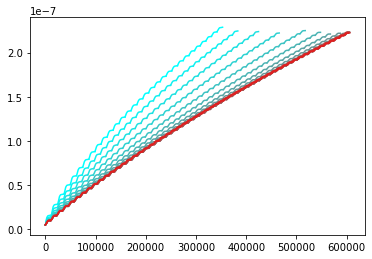

In [34]:
pltstr="Loss of lithium inventory [%]"
pltstr="X-averaged total SEI thickness [m]"
fig, ax = plt.subplots()
L=len(sols)
lamb=0
for j,sol in enumerate(sols):
    col=np.multiply([1.0,0.0,0.0],(lamb/L)) + np.multiply([0.0,1.0,1.0],(1-lamb/L))
    lamb+=1
    print(temps[j])
    print(col)
    filename="simulations/seigrowthat" + str(temps[j])+"C.mat"
    #sol.save_data(filename, variables=["X-averaged total SEI thickness [m]","Time [s]"], to_format='matlab', short_names={"X-averaged total SEI thickness [m]":"SEIthickness","Time [s]":"time"})
    try:
        for i,cycle in enumerate(sol.cycles):
            if i%1==0:
                t = cycle["Time [s]"].data
                LLI = cycle[pltstr].data
                ax.plot(t, LLI, color=col)
    except:
        continue

In [56]:
sol = sols[6]
cycles = sol.cycles
sol1= cycles[1]
sol1.steps[0]["Cell temperature [K]"].data

array([[303., 303., 303., ..., 303., 303., 303.],
       [303., 303., 303., ..., 303., 303., 303.],
       [303., 303., 303., ..., 303., 303., 303.],
       ...,
       [303., 303., 303., ..., 303., 303., 303.],
       [303., 303., 303., ..., 303., 303., 303.],
       [303., 303., 303., ..., 303., 303., 303.]])

In [14]:
filename

'simulations/seigrowthat80C.mat'

0
[[273. 273. 273. ... 273. 273. 273.]
 [273. 273. 273. ... 273. 273. 273.]
 [273. 273. 273. ... 273. 273. 273.]
 ...
 [273. 273. 273. ... 273. 273. 273.]
 [273. 273. 273. ... 273. 273. 273.]
 [273. 273. 273. ... 273. 273. 273.]]
1
[[278. 278. 278. ... 278. 278. 278.]
 [278. 278. 278. ... 278. 278. 278.]
 [278. 278. 278. ... 278. 278. 278.]
 ...
 [278. 278. 278. ... 278. 278. 278.]
 [278. 278. 278. ... 278. 278. 278.]
 [278. 278. 278. ... 278. 278. 278.]]
2
[[283. 283. 283. ... 283. 283. 283.]
 [283. 283. 283. ... 283. 283. 283.]
 [283. 283. 283. ... 283. 283. 283.]
 ...
 [283. 283. 283. ... 283. 283. 283.]
 [283. 283. 283. ... 283. 283. 283.]
 [283. 283. 283. ... 283. 283. 283.]]
3
[[288. 288. 288. ... 288. 288. 288.]
 [288. 288. 288. ... 288. 288. 288.]
 [288. 288. 288. ... 288. 288. 288.]
 ...
 [288. 288. 288. ... 288. 288. 288.]
 [288. 288. 288. ... 288. 288. 288.]
 [288. 288. 288. ... 288. 288. 288.]]


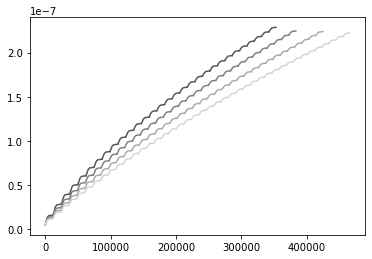

In [59]:
fig, ax = plt.subplots()
for j in range(4):
    sol = sols[j]
    col = (j+2)*np.array([1,1,1])/6
    for i,cycle in enumerate(sol.cycles):
        if i%1==0:
            t = cycle["Time [s]"].data
            LLI = cycle[pltstr].data
            ax.plot(t, LLI, color=col)
    print(j)
    print(sol.cycles[1].steps[0]["Cell temperature [K]"].data)

In [59]:
sols[1].cycles

In [7]:
spm.variable_names()

['Time',
 'Time [s]',
 'Time [min]',
 'Time [h]',
 'x',
 'x [m]',
 'x_n',
 'x_n [m]',
 'x_s',
 'x_s [m]',
 'x_p',
 'x_p [m]',
 'Sum of electrolyte reaction source terms',
 'Sum of negative electrode electrolyte reaction source terms',
 'Sum of positive electrode electrolyte reaction source terms',
 'Sum of x-averaged negative electrode electrolyte reaction source terms',
 'Sum of x-averaged positive electrode electrolyte reaction source terms',
 'Sum of interfacial current densities',
 'Sum of negative electrode interfacial current densities',
 'Sum of positive electrode interfacial current densities',
 'Sum of x-averaged negative electrode interfacial current densities',
 'Sum of x-averaged positive electrode interfacial current densities',
 'r_p',
 'r_p [m]',
 'r_n',
 'r_n [m]',
 'Current density variable',
 'Total current density',
 'Total current density [A.m-2]',
 'Current [A]',
 'C-rate',
 'Discharge capacity [A.h]',
 'Porosity',
 'Separator porosity',
 'Positive electrode porosi

In [9]:
spm.variables.search("sei")

Inner SEI concentration [mol.m-3]
Inner SEI interfacial current density
Inner SEI interfacial current density [A.m-2]
Inner SEI thickness
Inner SEI thickness [m]
Loss of capacity to SEI [A.h]
Loss of lithium to SEI [mol]
Negative electrode SEI interfacial current density
Negative electrode SEI thickness
Negative electrode SEI thickness [m]
Outer SEI concentration [mol.m-3]
Outer SEI interfacial current density
Outer SEI interfacial current density [A.m-2]
Outer SEI thickness
Outer SEI thickness [m]
Positive electrode SEI interfacial current density
SEI concentration [mol.m-3]
SEI film overpotential
SEI film overpotential [V]
SEI interfacial current density
SEI interfacial current density [A.m-2]
Total SEI thickness
Total SEI thickness [m]
X-averaged SEI concentration [mol.m-3]
X-averaged SEI film overpotential
X-averaged SEI film overpotential [V]
X-averaged SEI interfacial current density
X-averaged SEI interfacial current density [A.m-2]
X-averaged SEI thickness
X-averaged SEI thickn

In [47]:
parameter_values

{'1 + dlnf/dlnc': 1.0,
 'Ambient temperature [K]': 298.15,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': 0.38,
 'Cell cooling surface area [m2]': 0.41,
 'Cell volume [m3]': 3.92e-05,
 'Current function [A]': 5.0,
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'Edge heat transfer coefficient [W.m-2.K-1]': 5.0,
 'Electrode height [m]': 1.0,
 'Electrode width [m]': 0.205,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_PeymanMPM at 0x7ff0c4603550>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_PeymanMPM at 0x7ff0c46034c0>,
 'Exchange-current density for plating [A.m-2]': 0.001,
 'Initial concentration in electrolyte [mol.m-3]': 1000.0,
 'Initial concentration in negative electrode [mol.m-3]': 48.8682,
 'Initial concentration in positive electrode [mol.m-3]': 31513.0,
 'Initial inner SEI thickness [m]': 2.5e-09,
 'Initial outer SEI thickness [m]': 2.5e-09,
 

In [25]:
spm.parameters

[FunctionParameter(0x40b52f9e1feb550c, Current function [A], children=['time * 96485.33212 * Maximum concentration in negative electrode [mol.m-3] * (Negative electrode thickness [m] + Separator thickness [m] + Positive electrode thickness [m]) / absolute(Typical current [A] / (Number of electrodes connected in parallel to make a cell * Electrode width [m] * Electrode height [m]))'], domain=[], auxiliary_domains={}),
 Parameter(0x1a5a4d00809df729, Maximum concentration in negative electrode [mol.m-3], children=[], domain=[], auxiliary_domains={}),
 Parameter(0x383ade64015f63ff, Negative electrode thickness [m], children=[], domain=[], auxiliary_domains={}),
 Parameter(-0x5f8517d496e73d5a, Separator thickness [m], children=[], domain=[], auxiliary_domains={}),
 Parameter(0x2a67513ff62ced10, Positive electrode thickness [m], children=[], domain=[], auxiliary_domains={}),
 Parameter(-0x7af61de81f051d54, Typical current [A], children=[], domain=[], auxiliary_domains={}),
 Parameter(-0x7106

We can plot standard variables like the current and voltage, but it isn't very instructive on these timescales

In [21]:
sol.plot(["Total heating [W.m-3]","Reversible heating [W.m-3]", "Volume-averaged Ohmic heating [W.m-3]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=145.22059897473582, step=1.4522059897473583)…

Some other variables are more interesting

In [45]:
sim.plot([
    "Negative electrode SOC", 
    "Positive electrode SOC",
    "Total lithium in particles [mol]",
    "Loss of lithium to negative electrode SEI [mol]",
    "X-averaged negative electrode SEI thickness [m]",
])

IndentationError: unexpected indent (<ipython-input-45-ee5979607bd8>, line 2)

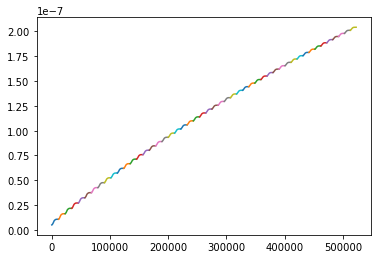

In [43]:
pltstr="Loss of lithium inventory [%]"
pltstr="X-averaged total SEI thickness [m]"
fig, ax = plt.subplots()
for i,cycle in enumerate(sim.solution.cycles):
    if i%1==0:
        t = cycle["Time [s]"].data
        LLI = cycle[pltstr].data
        ax.plot(t, LLI)

## Summary variables

We can also plot "summary variables", which show how the battery degrades over time by various metrics. Some of the variables also have "Change in ...", which is how much that variable changes over each cycle.

In [44]:
sorted(sol.summary_variables.keys())
1

1

Here the only degradation mechanism is one that causes loss of lithium, so we don't see loss of active material

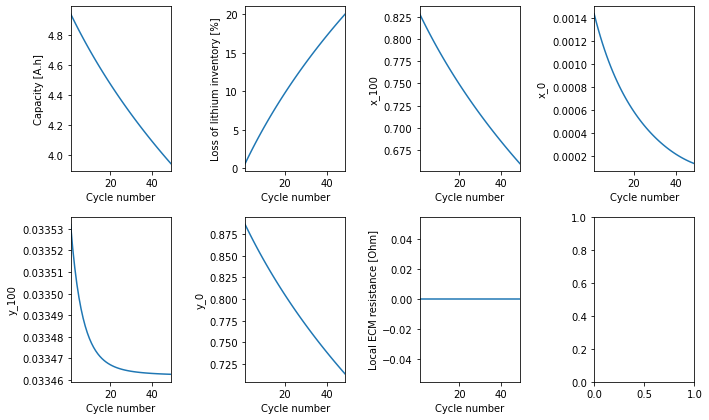

In [15]:
vars_to_plot = [
    "Capacity [A.h]",
    "Loss of lithium inventory [%]",
    "x_100",
    "x_0",
    "y_100",
    "y_0",
    "Local ECM resistance [Ohm]"
]
l = len(vars_to_plot)
n = int(l//np.sqrt(l))
m = int(np.ceil(l/n))

fig, axes = plt.subplots(n,m,figsize=(10,6))
for var, ax in zip(vars_to_plot,axes.flat):
    ax.plot(sol.summary_variables["Cycle number"], sol.summary_variables[var])
    ax.set_xlabel("Cycle number")
    ax.set_ylabel(var)
    ax.set_xlim([1,sol.summary_variables["Cycle number"][-1]])
fig.tight_layout()

To suggest additional summary variables, open an issue!

## Choosing which cycles to save

If the simulation contains thousands of cycles, saving each cycle in RAM might not be possible. To get around this, we can use `save_at_cycles`. If this is an integer `n`, every nth cycle is saved. If this is a list, all the cycles in the list are saved.
The first cycle is always saved.

In [9]:
# With integer
sim = pybamm.Simulation(spm, experiment=experiment, parameter_values=parameter_values)
sol_int = sim.solve(save_at_cycles=5)
# With list
sim = pybamm.Simulation(spm, experiment=experiment, parameter_values=parameter_values)
sol_list = sim.solve(save_at_cycles=[20,30,45])

2021-09-24 15:15:52,403 - [NOTICE] simulation.solve(784): Cycle 1/100 (25.598 ms elapsed) --------------------
2021-09-24 15:15:52,404 - [NOTICE] simulation.solve(818): Cycle 1/100, step 1/4: Charge at 1C until 4.2V
2021-09-24 15:15:52,448 - [NOTICE] simulation.solve(818): Cycle 1/100, step 2/4: Hold at 4.2V until C/50
2021-09-24 15:15:52,504 - [NOTICE] simulation.solve(818): Cycle 1/100, step 3/4: Discharge at 1C until 3V
2021-09-24 15:15:52,552 - [NOTICE] simulation.solve(818): Cycle 1/100, step 4/4: Rest for 1 hour
2021-09-24 15:15:52,729 - [NOTICE] simulation.solve(896): Capacity is now 4.941 Ah (originally 4.941 Ah, will stop at 3.952 Ah)
2021-09-24 15:15:52,729 - [NOTICE] simulation.solve(784): Cycle 2/100 (351.862 ms elapsed) --------------------
2021-09-24 15:15:52,730 - [NOTICE] simulation.solve(818): Cycle 2/100, step 1/4: Charge at 1C until 4.2V
2021-09-24 15:15:52,753 - [NOTICE] simulation.solve(818): Cycle 2/100, step 2/4: Hold at 4.2V until C/50
2021-09-24 15:15:52,775 - 

2021-09-24 15:15:53,896 - [NOTICE] simulation.solve(818): Cycle 13/100, step 4/4: Rest for 1 hour
2021-09-24 15:15:53,924 - [NOTICE] simulation.solve(896): Capacity is now 4.637 Ah (originally 4.941 Ah, will stop at 3.952 Ah)
2021-09-24 15:15:53,925 - [NOTICE] simulation.solve(784): Cycle 14/100 (1.547 s elapsed) --------------------
2021-09-24 15:15:53,925 - [NOTICE] simulation.solve(818): Cycle 14/100, step 1/4: Charge at 1C until 4.2V
2021-09-24 15:15:53,948 - [NOTICE] simulation.solve(818): Cycle 14/100, step 2/4: Hold at 4.2V until C/50
2021-09-24 15:15:53,971 - [NOTICE] simulation.solve(818): Cycle 14/100, step 3/4: Discharge at 1C until 3V
2021-09-24 15:15:53,995 - [NOTICE] simulation.solve(818): Cycle 14/100, step 4/4: Rest for 1 hour
2021-09-24 15:15:54,025 - [NOTICE] simulation.solve(896): Capacity is now 4.614 Ah (originally 4.941 Ah, will stop at 3.952 Ah)
2021-09-24 15:15:54,025 - [NOTICE] simulation.solve(784): Cycle 15/100 (1.648 s elapsed) --------------------
2021-09-2

2021-09-24 15:15:55,095 - [NOTICE] simulation.solve(818): Cycle 26/100, step 1/4: Charge at 1C until 4.2V
2021-09-24 15:15:55,116 - [NOTICE] simulation.solve(818): Cycle 26/100, step 2/4: Hold at 4.2V until C/50
2021-09-24 15:15:55,138 - [NOTICE] simulation.solve(818): Cycle 26/100, step 3/4: Discharge at 1C until 3V
2021-09-24 15:15:55,161 - [NOTICE] simulation.solve(818): Cycle 26/100, step 4/4: Rest for 1 hour
2021-09-24 15:15:55,189 - [NOTICE] simulation.solve(896): Capacity is now 4.362 Ah (originally 4.941 Ah, will stop at 3.952 Ah)
2021-09-24 15:15:55,190 - [NOTICE] simulation.solve(784): Cycle 27/100 (2.812 s elapsed) --------------------
2021-09-24 15:15:55,190 - [NOTICE] simulation.solve(818): Cycle 27/100, step 1/4: Charge at 1C until 4.2V
2021-09-24 15:15:55,210 - [NOTICE] simulation.solve(818): Cycle 27/100, step 2/4: Hold at 4.2V until C/50
2021-09-24 15:15:55,232 - [NOTICE] simulation.solve(818): Cycle 27/100, step 3/4: Discharge at 1C until 3V
2021-09-24 15:15:55,254 - 

2021-09-24 15:15:56,304 - [NOTICE] simulation.solve(896): Capacity is now 4.142 Ah (originally 4.941 Ah, will stop at 3.952 Ah)
2021-09-24 15:15:56,305 - [NOTICE] simulation.solve(784): Cycle 39/100 (3.927 s elapsed) --------------------
2021-09-24 15:15:56,305 - [NOTICE] simulation.solve(818): Cycle 39/100, step 1/4: Charge at 1C until 4.2V
2021-09-24 15:15:56,325 - [NOTICE] simulation.solve(818): Cycle 39/100, step 2/4: Hold at 4.2V until C/50
2021-09-24 15:15:56,347 - [NOTICE] simulation.solve(818): Cycle 39/100, step 3/4: Discharge at 1C until 3V
2021-09-24 15:15:56,369 - [NOTICE] simulation.solve(818): Cycle 39/100, step 4/4: Rest for 1 hour
2021-09-24 15:15:56,396 - [NOTICE] simulation.solve(896): Capacity is now 4.125 Ah (originally 4.941 Ah, will stop at 3.952 Ah)
2021-09-24 15:15:56,397 - [NOTICE] simulation.solve(784): Cycle 40/100 (4.019 s elapsed) --------------------
2021-09-24 15:15:56,397 - [NOTICE] simulation.solve(818): Cycle 40/100, step 1/4: Charge at 1C until 4.2V
2

2021-09-24 15:15:59,148 - [NOTICE] simulation.solve(818): Cycle 1/100, step 1/4: Charge at 1C until 4.2V
2021-09-24 15:15:59,195 - [NOTICE] simulation.solve(818): Cycle 1/100, step 2/4: Hold at 4.2V until C/50
2021-09-24 15:15:59,253 - [NOTICE] simulation.solve(818): Cycle 1/100, step 3/4: Discharge at 1C until 3V
2021-09-24 15:15:59,300 - [NOTICE] simulation.solve(818): Cycle 1/100, step 4/4: Rest for 1 hour
2021-09-24 15:15:59,459 - [NOTICE] simulation.solve(896): Capacity is now 4.941 Ah (originally 4.941 Ah, will stop at 3.952 Ah)
2021-09-24 15:15:59,459 - [NOTICE] simulation.solve(784): Cycle 2/100 (336.543 ms elapsed) --------------------
2021-09-24 15:15:59,460 - [NOTICE] simulation.solve(818): Cycle 2/100, step 1/4: Charge at 1C until 4.2V
2021-09-24 15:15:59,485 - [NOTICE] simulation.solve(818): Cycle 2/100, step 2/4: Hold at 4.2V until C/50
2021-09-24 15:15:59,507 - [NOTICE] simulation.solve(818): Cycle 2/100, step 3/4: Discharge at 1C until 3V
2021-09-24 15:15:59,532 - [NOTI

2021-09-24 15:16:00,684 - [NOTICE] simulation.solve(896): Capacity is now 4.637 Ah (originally 4.941 Ah, will stop at 3.952 Ah)
2021-09-24 15:16:00,684 - [NOTICE] simulation.solve(784): Cycle 14/100 (1.561 s elapsed) --------------------
2021-09-24 15:16:00,684 - [NOTICE] simulation.solve(818): Cycle 14/100, step 1/4: Charge at 1C until 4.2V
2021-09-24 15:16:00,707 - [NOTICE] simulation.solve(818): Cycle 14/100, step 2/4: Hold at 4.2V until C/50
2021-09-24 15:16:00,731 - [NOTICE] simulation.solve(818): Cycle 14/100, step 3/4: Discharge at 1C until 3V
2021-09-24 15:16:00,755 - [NOTICE] simulation.solve(818): Cycle 14/100, step 4/4: Rest for 1 hour
2021-09-24 15:16:00,785 - [NOTICE] simulation.solve(896): Capacity is now 4.614 Ah (originally 4.941 Ah, will stop at 3.952 Ah)
2021-09-24 15:16:00,785 - [NOTICE] simulation.solve(784): Cycle 15/100 (1.662 s elapsed) --------------------
2021-09-24 15:16:00,785 - [NOTICE] simulation.solve(818): Cycle 15/100, step 1/4: Charge at 1C until 4.2V
2

2021-09-24 15:16:01,962 - [NOTICE] simulation.solve(818): Cycle 26/100, step 2/4: Hold at 4.2V until C/50
2021-09-24 15:16:01,986 - [NOTICE] simulation.solve(818): Cycle 26/100, step 3/4: Discharge at 1C until 3V
2021-09-24 15:16:02,011 - [NOTICE] simulation.solve(818): Cycle 26/100, step 4/4: Rest for 1 hour
2021-09-24 15:16:02,041 - [NOTICE] simulation.solve(896): Capacity is now 4.362 Ah (originally 4.941 Ah, will stop at 3.952 Ah)
2021-09-24 15:16:02,043 - [NOTICE] simulation.solve(784): Cycle 27/100 (2.920 s elapsed) --------------------
2021-09-24 15:16:02,043 - [NOTICE] simulation.solve(818): Cycle 27/100, step 1/4: Charge at 1C until 4.2V
2021-09-24 15:16:02,065 - [NOTICE] simulation.solve(818): Cycle 27/100, step 2/4: Hold at 4.2V until C/50
2021-09-24 15:16:02,088 - [NOTICE] simulation.solve(818): Cycle 27/100, step 3/4: Discharge at 1C until 3V
2021-09-24 15:16:02,115 - [NOTICE] simulation.solve(818): Cycle 27/100, step 4/4: Rest for 1 hour
2021-09-24 15:16:02,144 - [NOTICE]

2021-09-24 15:16:03,227 - [NOTICE] simulation.solve(784): Cycle 39/100 (4.104 s elapsed) --------------------
2021-09-24 15:16:03,227 - [NOTICE] simulation.solve(818): Cycle 39/100, step 1/4: Charge at 1C until 4.2V
2021-09-24 15:16:03,248 - [NOTICE] simulation.solve(818): Cycle 39/100, step 2/4: Hold at 4.2V until C/50
2021-09-24 15:16:03,271 - [NOTICE] simulation.solve(818): Cycle 39/100, step 3/4: Discharge at 1C until 3V
2021-09-24 15:16:03,294 - [NOTICE] simulation.solve(818): Cycle 39/100, step 4/4: Rest for 1 hour
2021-09-24 15:16:03,323 - [NOTICE] simulation.solve(896): Capacity is now 4.125 Ah (originally 4.941 Ah, will stop at 3.952 Ah)
2021-09-24 15:16:03,324 - [NOTICE] simulation.solve(784): Cycle 40/100 (4.201 s elapsed) --------------------
2021-09-24 15:16:03,324 - [NOTICE] simulation.solve(818): Cycle 40/100, step 1/4: Charge at 1C until 4.2V
2021-09-24 15:16:03,344 - [NOTICE] simulation.solve(818): Cycle 40/100, step 2/4: Hold at 4.2V until C/50
2021-09-24 15:16:03,370

In [10]:
sol_int.cycles

 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [11]:
sol_list.cycles

 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

For the cycles that are saved, you can plot as usual (note off-by-1 indexing)

In [12]:
sol_list.cycles[44].plot(["Current [A]","Terminal voltage [V]"])

interactive(children=(FloatSlider(value=130.23147890700034, description='t', max=133.03234291931693, min=130.2…

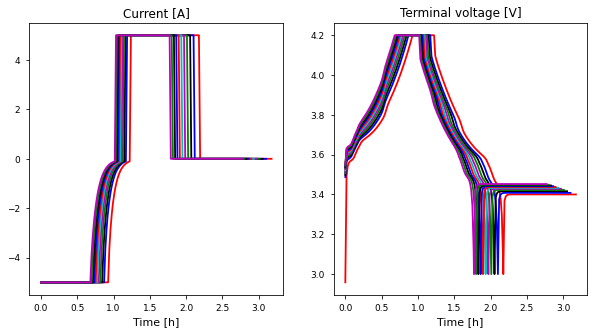

In [13]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
for cycle in sol_int.cycles:
    if cycle is not None:
        t = cycle["Time [h]"].data - cycle["Time [h]"].data[0]
        ax[0].plot(t, cycle["Current [A]"].data)
        ax[0].set_xlabel("Time [h]")
        ax[0].set_title("Current [A]")
        ax[1].plot(t, cycle["Terminal voltage [V]"].data)
        ax[1].set_xlabel("Time [h]")
        ax[1].set_title("Terminal voltage [V]")

All summary variables are always available for every cycle, since these are much less memory-intensive

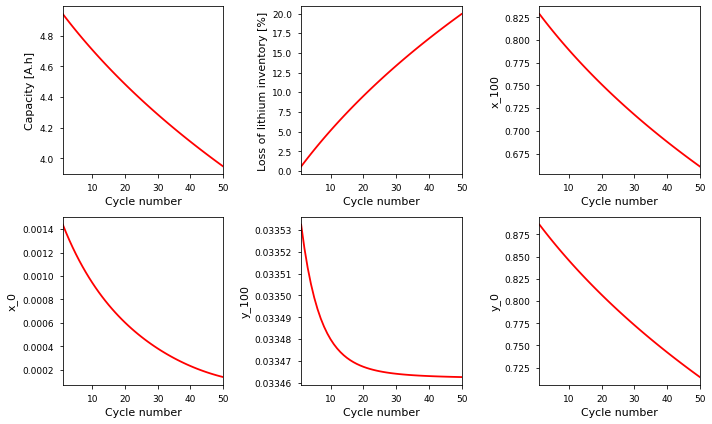

In [14]:
fig, axes = plt.subplots(n,m,figsize=(10,6))
for var, ax in zip(vars_to_plot,axes.flat):
    ax.plot(sol_list.summary_variables["Cycle number"], sol_list.summary_variables[var])
    ax.set_xlabel("Cycle number")
    ax.set_ylabel(var)
    ax.set_xlim([1,sol_list.summary_variables["Cycle number"][-1]])
fig.tight_layout()

## Starting solution

A simulation can be performed iteratively by using the `starting_solution` feature. For example, we first solve for 10 cycles

In [15]:
experiment = pybamm.Experiment([
    ("Charge at 1C until 4.2V", 
     "Hold at 4.2V until C/50",
     "Discharge at 1C until 3V",
     "Rest for 1 hour")
] * 10,
termination="80% capacity"
)
sim = pybamm.Simulation(spm, experiment=experiment, parameter_values=parameter_values)
sol = sim.solve()

2021-09-24 15:16:06,706 - [NOTICE] simulation.solve(784): Cycle 1/10 (24.556 ms elapsed) --------------------
2021-09-24 15:16:06,706 - [NOTICE] simulation.solve(818): Cycle 1/10, step 1/4: Charge at 1C until 4.2V
2021-09-24 15:16:06,751 - [NOTICE] simulation.solve(818): Cycle 1/10, step 2/4: Hold at 4.2V until C/50
2021-09-24 15:16:06,807 - [NOTICE] simulation.solve(818): Cycle 1/10, step 3/4: Discharge at 1C until 3V
2021-09-24 15:16:06,852 - [NOTICE] simulation.solve(818): Cycle 1/10, step 4/4: Rest for 1 hour
2021-09-24 15:16:07,226 - [NOTICE] simulation.solve(896): Capacity is now 4.941 Ah (originally 4.941 Ah, will stop at 3.952 Ah)
2021-09-24 15:16:07,226 - [NOTICE] simulation.solve(784): Cycle 2/10 (545.186 ms elapsed) --------------------
2021-09-24 15:16:07,227 - [NOTICE] simulation.solve(818): Cycle 2/10, step 1/4: Charge at 1C until 4.2V
2021-09-24 15:16:07,252 - [NOTICE] simulation.solve(818): Cycle 2/10, step 2/4: Hold at 4.2V until C/50
2021-09-24 15:16:07,275 - [NOTICE]

If we give `sol` as the starting solution this will then solve for the next 10 cycles

In [16]:
sol2 = sim.solve(starting_solution=sol)

2021-09-24 15:16:08,172 - [NOTICE] simulation.solve(784): Cycle 11/20 (26.129 ms elapsed) --------------------
2021-09-24 15:16:08,173 - [NOTICE] simulation.solve(818): Cycle 11/20, step 1/4: Charge at 1C until 4.2V
2021-09-24 15:16:08,195 - [NOTICE] simulation.solve(818): Cycle 11/20, step 2/4: Hold at 4.2V until C/50
2021-09-24 15:16:08,218 - [NOTICE] simulation.solve(818): Cycle 11/20, step 3/4: Discharge at 1C until 3V
2021-09-24 15:16:08,242 - [NOTICE] simulation.solve(818): Cycle 11/20, step 4/4: Rest for 1 hour
2021-09-24 15:16:08,362 - [NOTICE] simulation.solve(896): Capacity is now 4.683 Ah (originally 4.941 Ah, will stop at 3.952 Ah)
2021-09-24 15:16:08,362 - [NOTICE] simulation.solve(784): Cycle 12/20 (216.000 ms elapsed) --------------------
2021-09-24 15:16:08,363 - [NOTICE] simulation.solve(818): Cycle 12/20, step 1/4: Charge at 1C until 4.2V
2021-09-24 15:16:08,384 - [NOTICE] simulation.solve(818): Cycle 12/20, step 2/4: Hold at 4.2V until C/50
2021-09-24 15:16:08,407 - 

We have now simulated 20 cycles

In [17]:
len(sol2.cycles)

20

In [18]:
sol2.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=61.077971817103816, step=0.6107797181710382)…